In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#list_names = ['User1', 'User3','User4', 'User5', 'User6']#, 'User7']
list_names = ['User1', 'User3', 'User4', 'User5', 'User6', 'User7', 'User8']#,'User4', 'User5', 'User6']#, 'User7']

nbUsers = len(list_names)

list_beta = [1.05]
list_gamma = [0]

nbBetaGamma = len(list_beta)

addword = 'AllTimes-5s'

In [2]:
nbUsers

7

In [3]:
boneNames = []
bones = pd.Series()
bones = pd.read_csv('./BoneNames.csv')
bones = bones.transpose()
bones = bones.drop(bones.index[0])
for i in range(0, 19):
    boneNames.append('R-' + bones.iloc[0, i])
for i in range(0, 19):
    boneNames.append('L-' + bones.iloc[0, i])
    
for i in range(0, len(boneNames)):
    txt = boneNames[i]
    boneNames[i] = txt.replace('_CapsuleCollider', '')

In [4]:
globalAnalysis = pd.DataFrame()
analysisPerObj = pd.DataFrame()
objects = ['obj0', 'obj1', 'obj2', 'obj3', 'obj4', 'obj5', 'obj6', 'Cube', 'Cylinder']
analysisPerTask = pd.DataFrame()
tasks = ['Touch', 'Raise', 'Pull', 'Push', 'Push Down']
analysisPerScale = pd.DataFrame()
scales = ['small', 'medium', 'large']

for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-'+list_names[j]+ addword+ '.csv', sep = ";", decimal = '.')

        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        #betaGammaSummary = pd.merge(betaGammaTime, betaGammaSuccess, how = 'inner', on = 'Tolerance')
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        globalAnalysis = pd.concat([betaGammaSummary, globalAnalysis], axis = 0, sort = True)


for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perObject-'+list_names[j]+ addword+'.csv', sep = ";", decimal = '.')


        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        #betaGammaSummary = pd.merge(betaGammaTime, betaGammaSuccess, how = 'inner', on = 'Tolerance')
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisPerObj = pd.concat([betaGammaSummary, analysisPerObj], axis = 0, sort = True)


for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perTask-'+list_names[j]+ addword+'.csv', sep = ";", decimal = '.')

        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisPerTask = pd.concat([betaGammaSummary, analysisPerTask], axis = 0, sort = True)


for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perScale-'+list_names[j]+ addword+'.csv', sep = ";", decimal = '.')

        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisPerScale = pd.concat([betaGammaSummary, analysisPerScale], axis = 0, sort = True)




In [5]:
analysisBoneDistPerScale = pd.DataFrame()
analysisBoneDistPerObj = pd.DataFrame()
analysisBoneDistPerTask = pd.DataFrame()


for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perObject-BoneDist-'+list_names[j]+ addword+'.csv', sep = ";", decimal = '.')


        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        #betaGammaSummary = pd.merge(betaGammaTime, betaGammaSuccess, how = 'inner', on = 'Tolerance')
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisBoneDistPerObj = pd.concat([betaGammaSummary, analysisBoneDistPerObj], axis = 0, sort = True)

    
for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perTask-BoneDist-'+list_names[j]+ addword+'.csv', sep = ";", decimal = '.')

        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisBoneDistPerTask = pd.concat([betaGammaSummary, analysisBoneDistPerTask], axis = 0, sort = True)

    
for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perScale-BoneDist-'+list_names[j]+ addword+'.csv', sep = ";", decimal = '.')

        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisBoneDistPerScale = pd.concat([betaGammaSummary, analysisBoneDistPerScale], axis = 0, sort = True)

    

In [6]:
#This is the mean over all the users
meanUsers = pd.DataFrame()
for paramB in range(0, nbBetaGamma):
    for tol in range(0, 50):
        meanUsersBeta = pd.DataFrame()
        cond = (globalAnalysis['Tolerance'] == globalAnalysis['Tolerance'].iloc[tol]) & (globalAnalysis['Beta'] == list_beta[paramB]) & (globalAnalysis['Gamma'] == list_gamma[paramB])
        meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Beta'] = list_beta[paramB]
        meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Gamma'] = list_gamma[paramB]    
        for j in range(0, 38):
            meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Phalanx.'+str(j)] = globalAnalysis[cond]['Phalanx.'+str(j)].mean()
            meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'BoneDist.'+str(j)] = globalAnalysis[cond]['BoneDist.'+str(j)].mean()
            meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Speed.'+str(j)] = abs(globalAnalysis[cond]['Speed.'+str(j)].mean())

            meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Beta'] = list_beta[paramB]
            meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Gamma'] = list_gamma[paramB]    
        meanUsers = pd.concat([meanUsersBeta, meanUsers], axis = 0, sort = True)
            

In [7]:
meanUsers.head()

Beta  BoneDist.0  BoneDist.1  BoneDist.10  BoneDist.11  BoneDist.12  \
580  1.05   70.226889   70.194952    50.986434    57.883156    67.875366   
570  1.05   77.272415   77.292138    52.101041    55.780628    65.261933   
560  1.05   70.586287   71.051210    49.447379    53.110274    60.241193   
550  1.05   64.364910   65.113504    45.388259    55.627011    59.810078   
540  1.05   49.234474   50.479475    47.116890    52.785620    58.323370   

     BoneDist.13  BoneDist.14  BoneDist.15  BoneDist.16  ...    Speed.34  \
580    59.404029    53.633043    60.160850    62.548685  ...   99.475896   
570    58.310174    53.895355    58.405447    57.531305  ...  117.758413   
560    54.882882    53.762433    58.367534    62.711550  ...  132.758086   
550    52.188320    53.208689    56.434949    60.113286  ...  119.582844   
540    45.106825    49.985954    55.604432    53.538515  ...  124.810111   

       Speed.35    Speed.36    Speed.37    Speed.4   Speed.5   Speed.6  \
580  115.465290  100.642351  116.454118   2.338752  1.173579  3.946142   
570  141.329225  129.984100  135.495997   8.032457  1.698372  2.426661   
560  147.216925  146.395328  149.700720  10.959983  2.059817  0.101217   
550  115.210694  131.232343  130.204308  17.042425  1.526959  1.650351   
540  118.170776  115.668775  138.225879   9.691835  2.874078  1.072142   

      Speed.7    Speed.8    Speed.9  
580  2.879647  14.171366  11.003256  
570  5.138022  15.163792   8.062220  
560  6.758052  14.428993   8.890335  
550  8.135643   3.474643   0.383392  
540  7.639467   3.130293   1.388817  

[5 rows x 116 columns]

In [8]:
meanPerObj = pd.DataFrame()
meanPerTask = pd.DataFrame()
meanPerScale = pd.DataFrame()


for paramB in range(0, nbBetaGamma):
    for tol in range(0, 50):
        meanPerObjB = pd.DataFrame()
        meanPerScaleB = pd.DataFrame()
        meanPerTaskB = pd.DataFrame()
        
        cond = (analysisPerScale['Tolerance'] == analysisPerScale['Tolerance'].iloc[tol]) & (analysisPerScale['Beta'] == list_beta[paramB]) & (analysisPerScale['Gamma'] == list_gamma[paramB])
        meanPerObjB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Beta'] = list_beta[paramB]
        meanPerObjB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Gamma'] = list_gamma[paramB]    
        
        meanPerScaleB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Beta'] = list_beta[paramB]
        meanPerScaleB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Gamma'] = list_gamma[paramB]    

        meanPerTaskB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Beta'] = list_beta[paramB]
        meanPerTaskB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Gamma'] = list_gamma[paramB]    

        for j in range(0, len(objects)):
            meanPerObjB.loc[globalAnalysis['Tolerance'].iloc[tol], objects[j]] = analysisPerObj[cond][objects[j]].mean()
        meanPerObj = pd.concat([meanPerObjB, meanPerObj], axis = 0, sort = True)
        
        for j in range(0, len(tasks)):
            meanPerTaskB.loc[globalAnalysis['Tolerance'].iloc[tol], tasks[j]] = analysisPerTask[cond][tasks[j]].mean()
        meanPerTask = pd.concat([meanPerTaskB, meanPerTask], axis = 0, sort = True)
        
        for j in range(0, len(scales)):
            meanPerScaleB.loc[globalAnalysis['Tolerance'].iloc[tol], scales[j]] = analysisPerScale[cond][scales[j]].mean()
        meanPerScale = pd.concat([meanPerScaleB, meanPerScale], axis = 0, sort = True)
        
        
           

In [9]:
allConfig = pd.DataFrame()

for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-AllConfigTypes-'+list_names[j]+ addword+'.csv', sep = ";", decimal = '.')

        betaGammaTime['Config'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Config'])
        betaGammaSummary = betaGammaTime
        #betaGammaSummary.index = betaGammaSummary['Tolerance']
        #betaGammaSummary['Beta'] = float(beta)
        #betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        allConfig = pd.concat([betaGammaSummary, allConfig], axis = 0, sort = True)

In [10]:
allConfig.head()

Config  DistBoneInTolTime.0  DistBoneInTolTime.100  DistBoneInTolTime.1000  \
0       0                  0.0               2.282057               24.754786   
1       1                  0.0               5.895050               46.828217   
2       2                  0.0               2.202950               16.110625   
3       3                  0.0               2.278050               17.989637   
4       4                  0.0              29.233879              332.416581   

   DistBoneInTolTime.1010  DistBoneInTolTime.1020  DistBoneInTolTime.1030  \
0               24.754786               28.369243               28.319414   
1               46.828217               40.804040               28.674850   
2               19.765600               19.765600               19.765600   
3               19.948657               19.296500               18.214875   
4              335.018162              311.038681              308.564019   

   DistBoneInTolTime.1040  DistBoneInTolTime.1050  DistBoneInTolTime.1060  \
0               27.234886               27.234886               27.234886   
1               47.457233               45.663680               46.769633   
2               21.265875               21.265875               27.099225   
3               18.312813               17.987913               19.870238   
4              308.509313              310.026913              310.249781   

   ...  Speed.920  Speed.930  Speed.940  Speed.950   Speed.960   Speed.970  \
0  ...   5.150637   5.125568   4.133841   5.858170    3.784841    4.077478   
1  ...   2.024532   2.306640   1.351898   0.734950    1.185956   -0.815326   
2  ...   5.670952   5.670952   0.174105   1.725089   11.997836   11.997836   
3  ...  -4.629282  -5.743197  -5.423613  -5.334622   -4.698398   -2.546689   
4  ... -27.391883 -22.250317 -70.158246 -65.917729 -151.534660 -152.216314   

    Speed.980   Speed.990       Task   User  
0    4.199153    5.942600      Touch  User8  
1   -5.667958   -5.667958      Raise  User8  
2   11.997836   11.997836       Pull  User8  
3   -8.214105   -7.239772       Push  User8  
4 -151.790536 -152.600706  Push Down  User8  

[5 rows x 1989 columns]

In [11]:
#Mean per config, All users?

In [12]:
meanPerScale.tail()

Beta  Gamma      large     medium      small
130  1.05    0.0   9.980804  15.013331  11.610310
120  1.05    0.0  12.482390  14.802679   9.957488
110  1.05    0.0  12.146813  14.808081   8.863490
100  1.05    0.0  10.310435  15.821044  11.474245
0    1.05    0.0   4.107064   4.453216   3.531488

In [14]:
globalAnalysis

Beta  BoneDist.0  BoneDist.1  BoneDist.10  BoneDist.11  \
Tolerance                                                           
0          1.05    0.000000    0.000000     0.000000     0.000000   
100        1.05   13.914895   13.914895     7.496851     5.467434   
110        1.05   15.022222   15.291953     8.061091     6.114210   
120        1.05   16.820228   16.995326     8.847226     5.769283   
130        1.05   17.279515   17.484343    10.115257     5.763101   
140        1.05   21.694336   23.345264    11.505190     7.526553   
150        1.05   22.318854   23.715800    11.631357     8.869285   
160        1.05   14.731133   15.641436    10.687516     9.093481   
170        1.05   20.769056   22.021200     9.466514    10.164575   
180        1.05   20.570188   21.731644    11.355800    10.813800   
190        1.05   21.547112   21.547112    13.945861     9.434292   
200        1.05   21.111553   21.111547    13.422931    13.448458   
210        1.05   18.126354   21.169364    14.289090    13.731072   
220        1.05   22.044636   24.623560    16.987868    14.127102   
230        1.05   30.524936   32.538507    17.001368    16.046553   
240        1.05   33.122613   34.847981    32.236676    17.091804   
250        1.05   32.027935   34.298200    28.102032    10.470344   
260        1.05   32.375953   33.016075    25.833893    15.406392   
270        1.05   21.417389   21.375235    24.638371    16.575689   
280        1.05   16.282225   15.892107    25.776397    15.156251   
290        1.05   22.093162   22.089758    25.725041    16.412827   
300        1.05   20.517364   20.326967    29.633515    18.259457   
310        1.05   23.884820   23.495856    29.857546    14.429039   
320        1.05   88.414883   82.972300    30.768765    13.495522   
330        1.05   78.609906   75.024694    29.363176    18.918444   
340        1.05   66.198029   63.501550    22.643130    18.991583   
350        1.05   76.363247   77.216238    24.728317    18.923655   
360        1.05   77.610544   78.603553    34.596038    21.662872   
370        1.05   33.278944   31.547388    35.663978    20.401239   
380        1.05   30.023557   27.508800    35.145026    19.463124   
...         ...         ...         ...          ...          ...   
4750       1.05  107.309500  107.309500   232.921800   217.965767   
4760       1.05  109.600833  109.600833   219.453294   225.197422   
4770       1.05  109.600833  109.600833   214.627418   239.537789   
4780       1.05  162.059500  162.059500   224.579380   267.114578   
4790       1.05  162.059500  162.059500   205.092388   273.828856   
4800       1.05  161.084450  161.084450   206.287544   286.247850   
4810       1.05  175.307067  175.307067   217.210787   292.932287   
4820       1.05  160.932100  160.932100   208.168239   295.657163   
4830       1.05  102.527500  102.527500   202.497932   278.459489   
4840       1.05  104.834300  104.834300   219.931281   304.375612   
4850       1.05  104.834300  104.834300   189.594680   282.052478   
4860       1.05  104.834300  104.834300   184.765861   274.956178   
4870       1.05   81.415300   81.415300   187.577988   235.695689   
4880       1.05   81.415300   81.415300   184.239543   270.521786   
4890       1.05   96.049133   96.049133   202.874076   206.339743   
4900       1.05   96.049133   96.049133   203.826047   321.469962   
4910       1.05   98.112733   98.112733   260.193907   362.607287   
4920       1.05  100.715467  100.715467   263.709053   324.893967   
4930       1.05  100.715467  100.715467   241.447128   328.027767   
4940       1.05   92.955050   92.955050   227.969156   283.779750   
4950       1.05   95.489933   95.489933   176.621906   285.789100   
4960       1.05   95.489933   95.489933   167.055217   301.467214   
4970       1.05   95.024700   95.024700   169.103933   307.200014   
4980       1.05   95.024700   95.024700   202.595963   302.129243   
4990       1.05   90.195633   90.195633   213.696747   285.951100   
5000     

In [15]:
analysisPerTask.head()

Beta  Gamma       Pull      Push  Push Down      Raise  Tolerance  \
Tolerance                                                                      
0          1.05    0.0   1.557785  1.292211   3.293725   2.948979          0   
100        1.05    0.0  14.759740  9.018784   3.239060  14.328559        100   
110        1.05    0.0  14.101455  8.947437   3.389395  15.827900        110   
120        1.05    0.0  14.652332  4.098591  11.072790  13.250689        120   
130        1.05    0.0  14.529959  6.277685  10.788748  13.251226        130   

               Touch   User  
Tolerance                    
0           2.402696  User8  
100        14.847330  User8  
110        15.797379  User8  
120        15.690928  User8  
130        13.324013  User8

In [16]:
globalAnalysis.iloc[1]

Beta               1.05
BoneDist.0      13.9149
BoneDist.1      13.9149
BoneDist.10     7.49685
BoneDist.11     5.46743
BoneDist.12     4.49624
BoneDist.13     6.36882
BoneDist.14     5.06078
BoneDist.15     4.45527
BoneDist.16     5.44546
BoneDist.17     4.38859
BoneDist.18     5.71617
BoneDist.19     6.09515
BoneDist.2      4.25913
BoneDist.20     6.83964
BoneDist.21     5.55095
BoneDist.22     5.02595
BoneDist.23     5.98234
BoneDist.24     7.00718
BoneDist.25     21.6259
BoneDist.26     5.35745
BoneDist.27     8.13421
BoneDist.28     6.28809
BoneDist.29     3.84609
BoneDist.3      5.81582
BoneDist.30     7.23833
BoneDist.31     7.29968
BoneDist.32     4.37262
BoneDist.33     7.00141
BoneDist.34     6.97328
                 ...   
Speed.18      -0.770618
Speed.19          249.7
Speed.2         5.70713
Speed.20        253.302
Speed.21         218.57
Speed.22        171.662
Speed.23        237.136
Speed.24        124.861
Speed.25        88.6629
Speed.26        174.766
Speed.27        

In [81]:
tol = 0
for user in range(0, nbUsers):
    cond = (globalAnalysis['Tolerance'] == tol) & (globalAnalysis['User'] == list_names[user])
    nbPhal = 0
    totalFingerTips = 0
    totalBones = 0
    for fingertip in range(6, 19, 3):
        if(np.isnan(globalAnalysis[cond]['Phalanx.'+str(fingertip)].dropna().mean()) == False):
            nbPhal = nbPhal + 1
            totalFingerTips = totalFingerTips + globalAnalysis[cond]['Phalanx.'+str(fingertip)].dropna().mean()
            totalBones = totalBones + globalAnalysis[cond]['BoneDist.'+str(fingertip)].dropna().mean()

    globalAnalysis.loc[tol, 'R-FingerTips_'+str(list_names[user])] = totalFingerTips/nbPhal
    globalAnalysis.loc[tol, 'R-BonesFingerTips_'+str(list_names[user])] = totalBones/nbPhal

for tol in range(100, 3050, 10):
    for user in range(0, nbUsers):
        cond = (globalAnalysis['Tolerance'] == tol) & (globalAnalysis['User'] == list_names[user])
        nbPhal = 0
        totalFingerTips = 0
        totalBones = 0
        for fingertip in range(6, 19, 3):
            if(np.isnan(globalAnalysis[cond]['Phalanx.'+str(fingertip)].dropna().mean()) == False):
                nbPhal = nbPhal + 1
                totalFingerTips = totalFingerTips + globalAnalysis[cond]['Phalanx.'+str(fingertip)].dropna().mean()
                totalBones = totalBones + globalAnalysis[cond]['BoneDist.'+str(fingertip)].dropna().mean()

        globalAnalysis.loc[tol, 'R-FingerTips_'+str(list_names[user])] = totalFingerTips/nbPhal
        globalAnalysis.loc[tol, 'R-BonesFingerTips_'+str(list_names[user])] = totalBones/nbPhal

tol = 0
for user in range(0, nbUsers):
    cond = (globalAnalysis['Tolerance'] == tol) & (globalAnalysis['User'] == list_names[user])
    nbPhal = 0
    totalFingerTips = 0
    totalBones = 0
    for fingertip in range(25, 38, 3):
        if(np.isnan(globalAnalysis[cond]['Phalanx.'+str(fingertip)].dropna().mean()) == False):
            nbPhal = nbPhal + 1
            totalFingerTips = totalFingerTips + globalAnalysis[cond]['Phalanx.'+str(fingertip)].dropna().mean()
            totalBones = totalBones + globalAnalysis[cond]['BoneDist.'+str(fingertip)].dropna().mean()

    globalAnalysis.loc[tol, 'L-FingerTips_'+str(list_names[user])] = totalFingerTips/nbPhal
    globalAnalysis.loc[tol, 'L-BonesFingerTips_'+str(list_names[user])] = totalBones/nbPhal

for tol in range(100, 3050, 10):
    for user in range(0, nbUsers):
        cond = (globalAnalysis['Tolerance'] == tol) & (globalAnalysis['User'] == list_names[user])
        nbPhal = 0
        totalFingerTips = 0
        totalBones = 0
        for fingertip in range(25, 38, 3):
            if(np.isnan(globalAnalysis[cond]['Phalanx.'+str(fingertip)].dropna().mean()) == False):
                nbPhal = nbPhal + 1
                totalFingerTips = totalFingerTips + globalAnalysis[cond]['Phalanx.'+str(fingertip)].dropna().mean()
                totalBones = totalBones + globalAnalysis[cond]['BoneDist.'+str(fingertip)].dropna().mean()

        globalAnalysis.loc[tol, 'L-FingerTips_'+str(list_names[user])] = totalFingerTips/nbPhal
        globalAnalysis.loc[tol, 'L-BonesFingerTips_'+str(list_names[user])] = totalBones/nbPhal



In [82]:
for user in range(0, nbUsers):
    cond = globalAnalysis['User'] == list_names[user]
    globalAnalysis.loc[cond, 'R-FingerTips'] = globalAnalysis[cond]['R-FingerTips_'+str(list_names[user])]
    globalAnalysis.loc[cond,'R-BonesFingerTips'] = globalAnalysis[cond]['R-BonesFingerTips_'+str(list_names[user])]
    globalAnalysis.loc[cond, 'L-FingerTips'] = globalAnalysis[cond]['L-FingerTips_'+str(list_names[user])]
    globalAnalysis.loc[cond,'L-BonesFingerTips'] = globalAnalysis[cond]['L-BonesFingerTips_'+str(list_names[user])]
    
    

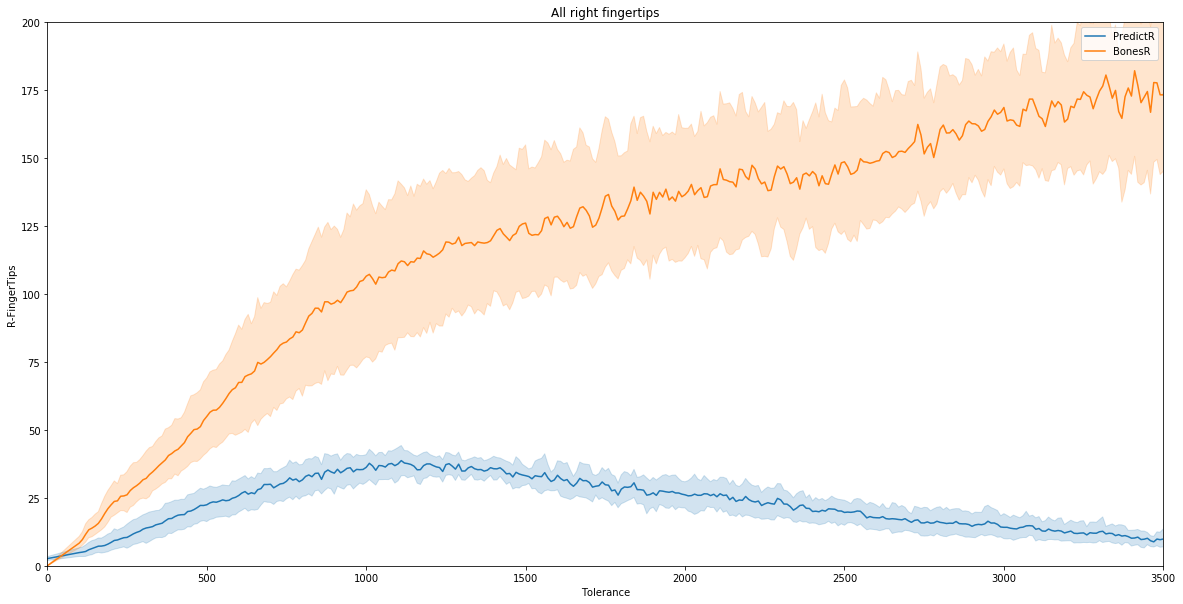

In [83]:
plt.figure(figsize = (20, 10))
#for user in range(0, nbUsers):
#    cond = (globalAnalysis['User'] == list_names[user])

sns.lineplot( x = 'Tolerance', y = 'R-FingerTips', data = globalAnalysis, label = 'PredictR')#+str(list_names[user]))
sns.lineplot( x = 'Tolerance', y = 'R-BonesFingerTips', data = globalAnalysis, label = 'BonesR')#+str(list_names[user]))

#sns.lineplot( x = 'Tolerance', y = 'L-FingerTips', data = globalAnalysis, label = 'PredictL')#+str(list_names[user]))
#sns.lineplot( x = 'Tolerance', y = 'L-BonesFingerTips', data = globalAnalysis, label = 'BonesL')#+str(list_names[user]))
plt.title('All right fingertips')
plt.ylim(0,200)
plt.xlim(0, 3500)
plt.legend()

In [84]:
tol = 0
for user in range(0, nbUsers):
    cond = (globalAnalysis['Tolerance'] == tol) & (globalAnalysis['User'] == list_names[user])
    nbPhal = 0
    totalFingerTips = 0
    totalBones = 0
    for fingertip in range(6, 10, 3):
        if(np.isnan(globalAnalysis[cond]['Phalanx.'+str(fingertip)].dropna().mean()) == False):
            nbPhal = nbPhal + 1
            totalFingerTips = totalFingerTips + globalAnalysis[cond]['Phalanx.'+str(fingertip)].dropna().mean()
            totalBones = totalBones + globalAnalysis[cond]['BoneDist.'+str(fingertip)].dropna().mean()

    globalAnalysis.loc[tol, 'R-FingerTips_'+str(list_names[user])] = totalFingerTips/nbPhal
    globalAnalysis.loc[tol, 'R-BonesFingerTips_'+str(list_names[user])] = totalBones/nbPhal

for tol in range(100, 3050, 10):
    for user in range(0, nbUsers):
        cond = (globalAnalysis['Tolerance'] == tol) & (globalAnalysis['User'] == list_names[user])
        nbPhal = 0
        totalFingerTips = 0
        totalBones = 0
        for fingertip in range(6, 10, 3):
            if(np.isnan(globalAnalysis[cond]['Phalanx.'+str(fingertip)].dropna().mean()) == False):
                nbPhal = nbPhal + 1
                totalFingerTips = totalFingerTips + globalAnalysis[cond]['Phalanx.'+str(fingertip)].dropna().mean()
                totalBones = totalBones + globalAnalysis[cond]['BoneDist.'+str(fingertip)].dropna().mean()

        globalAnalysis.loc[tol, 'R-FingerTips_'+str(list_names[user])] = totalFingerTips/nbPhal
        globalAnalysis.loc[tol, 'R-BonesFingerTips_'+str(list_names[user])] = totalBones/nbPhal

tol = 0
for user in range(0, nbUsers):
    cond = (globalAnalysis['Tolerance'] == tol) & (globalAnalysis['User'] == list_names[user])
    nbPhal = 0
    totalFingerTips = 0
    totalBones = 0
    for fingertip in range(25, 30, 3):
        if(np.isnan(globalAnalysis[cond]['Phalanx.'+str(fingertip)].dropna().mean()) == False):
            nbPhal = nbPhal + 1
            totalFingerTips = totalFingerTips + globalAnalysis[cond]['Phalanx.'+str(fingertip)].dropna().mean()
            totalBones = totalBones + globalAnalysis[cond]['BoneDist.'+str(fingertip)].dropna().mean()

    globalAnalysis.loc[tol, 'L-FingerTips_'+str(list_names[user])] = totalFingerTips/nbPhal
    globalAnalysis.loc[tol, 'L-BonesFingerTips_'+str(list_names[user])] = totalBones/nbPhal

for tol in range(100, 3050, 10):
    for user in range(0, nbUsers):
        cond = (globalAnalysis['Tolerance'] == tol) & (globalAnalysis['User'] == list_names[user])
        nbPhal = 0
        totalFingerTips = 0
        totalBones = 0
        for fingertip in range(25, 30, 3):
            if(np.isnan(globalAnalysis[cond]['Phalanx.'+str(fingertip)].dropna().mean()) == False):
                nbPhal = nbPhal + 1
                totalFingerTips = totalFingerTips + globalAnalysis[cond]['Phalanx.'+str(fingertip)].dropna().mean()
                totalBones = totalBones + globalAnalysis[cond]['BoneDist.'+str(fingertip)].dropna().mean()

        globalAnalysis.loc[tol, 'L-FingerTips_'+str(list_names[user])] = totalFingerTips/nbPhal
        globalAnalysis.loc[tol, 'L-BonesFingerTips_'+str(list_names[user])] = totalBones/nbPhal



In [85]:
for user in range(0, nbUsers):
    cond = globalAnalysis['User'] == list_names[user]
    globalAnalysis.loc[cond, 'R-FingerTips'] = globalAnalysis[cond]['R-FingerTips_'+str(list_names[user])]
    globalAnalysis.loc[cond,'R-BonesFingerTips'] = globalAnalysis[cond]['R-BonesFingerTips_'+str(list_names[user])]
    globalAnalysis.loc[cond, 'L-FingerTips'] = globalAnalysis[cond]['L-FingerTips_'+str(list_names[user])]
    globalAnalysis.loc[cond,'L-BonesFingerTips'] = globalAnalysis[cond]['L-BonesFingerTips_'+str(list_names[user])]
    
    

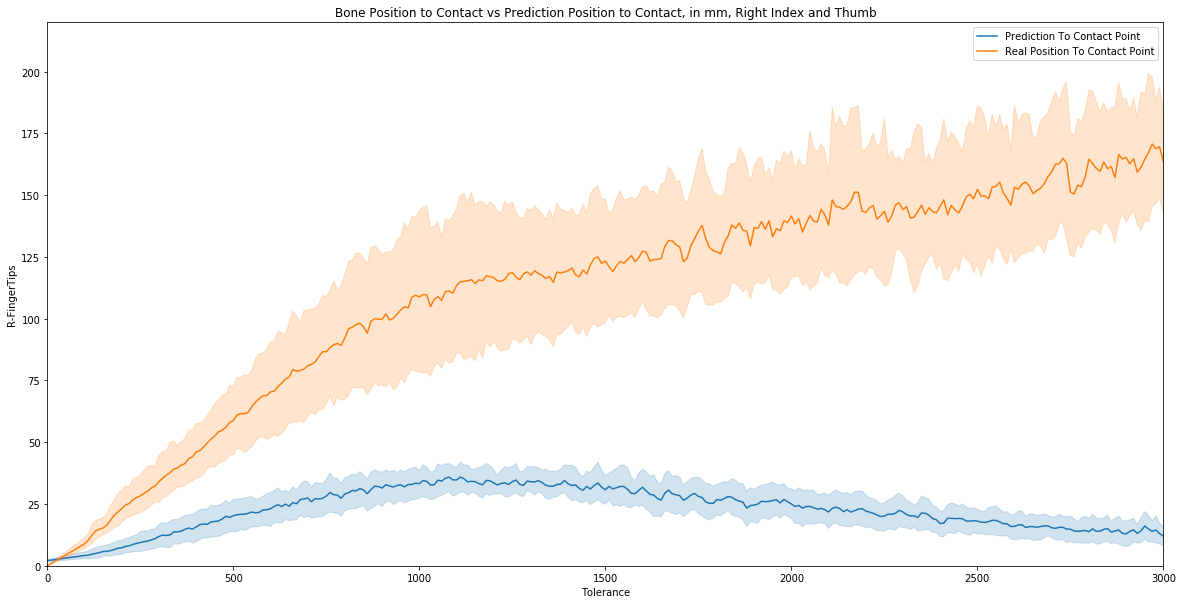

In [89]:
plt.figure(figsize = (20, 10))
#for user in range(0, nbUsers):
#    cond = (globalAnalysis['User'] == list_names[user])

sns.lineplot( x = 'Tolerance', y = 'R-FingerTips', data = globalAnalysis, label = 'Prediction To Contact Point')#+str(list_names[user]))
sns.lineplot( x = 'Tolerance', y = 'R-BonesFingerTips', data = globalAnalysis, label = 'Real Position To Contact Point')#+str(list_names[user]))

#sns.lineplot( x = 'Tolerance', y = 'L-FingerTips', data = globalAnalysis, label = 'PredictL')#+str(list_names[user]))
#sns.lineplot( x = 'Tolerance', y = 'L-BonesFingerTips', data = globalAnalysis, label = 'BonesL')#+str(list_names[user]))
plt.title('Bone Position to Contact vs Prediction Position to Contact, in mm, Right Index and Thumb')
plt.xlim(0,3000)
plt.ylim(0,220)
plt.legend()

In [87]:
meanUsers.head()

Beta  BoneDist.0  BoneDist.1  BoneDist.10  BoneDist.11  BoneDist.12  \
580  1.05   70.226889   70.194952    50.986434    57.883156    67.875366   
570  1.05   77.272415   77.292138    52.101041    55.780628    65.261933   
560  1.05   70.586287   71.051210    49.447379    53.110274    60.241193   
550  1.05   64.364910   65.113504    45.388259    55.627011    59.810078   
540  1.05   49.234474   50.479475    47.116890    52.785620    58.323370   

     BoneDist.13  BoneDist.14  BoneDist.15  BoneDist.16  ...    Speed.34  \
580    59.404029    53.633043    60.160850    62.548685  ...   99.475896   
570    58.310174    53.895355    58.405447    57.531305  ...  117.758413   
560    54.882882    53.762433    58.367534    62.711550  ...  132.758086   
550    52.188320    53.208689    56.434949    60.113286  ...  119.582844   
540    45.106825    49.985954    55.604432    53.538515  ...  124.810111   

       Speed.35    Speed.36    Speed.37    Speed.4   Speed.5   Speed.6  \
580  115.465290  100.642351  116.454118   2.338752  1.173579  3.946142   
570  141.329225  129.984100  135.495997   8.032457  1.698372  2.426661   
560  147.216925  146.395328  149.700720  10.959983  2.059817  0.101217   
550  115.210694  131.232343  130.204308  17.042425  1.526959  1.650351   
540  118.170776  115.668775  138.225879   9.691835  2.874078  1.072142   

      Speed.7    Speed.8    Speed.9  
580  2.879647  14.171366  11.003256  
570  5.138022  15.163792   8.062220  
560  6.758052  14.428993   8.890335  
550  8.135643   3.474643   0.383392  
540  7.639467   3.130293   1.388817  

[5 rows x 116 columns]

(0, 250)

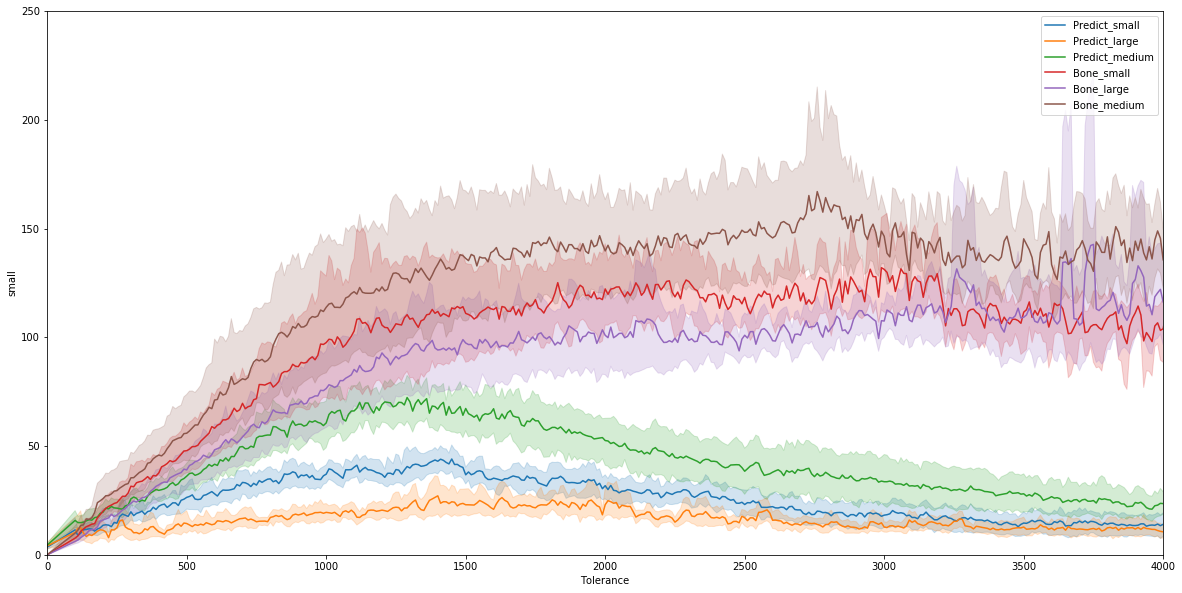

In [88]:
plt.figure(figsize=(20,10))
alphaplot = sns.lineplot(x = 'Tolerance', y = 'small', data = analysisPerScale, label = 'Predict_small')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'large', data = analysisPerScale, label = 'Predict_large')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'medium', data = analysisPerScale, label = 'Predict_medium')

alphaplot = sns.lineplot(x = 'Tolerance', y = 'small', data = analysisBoneDistPerScale, label = 'Bone_small')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'large', data = analysisBoneDistPerScale, label = 'Bone_large')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'medium', data = analysisBoneDistPerScale, label = 'Bone_medium')


(0, 200)

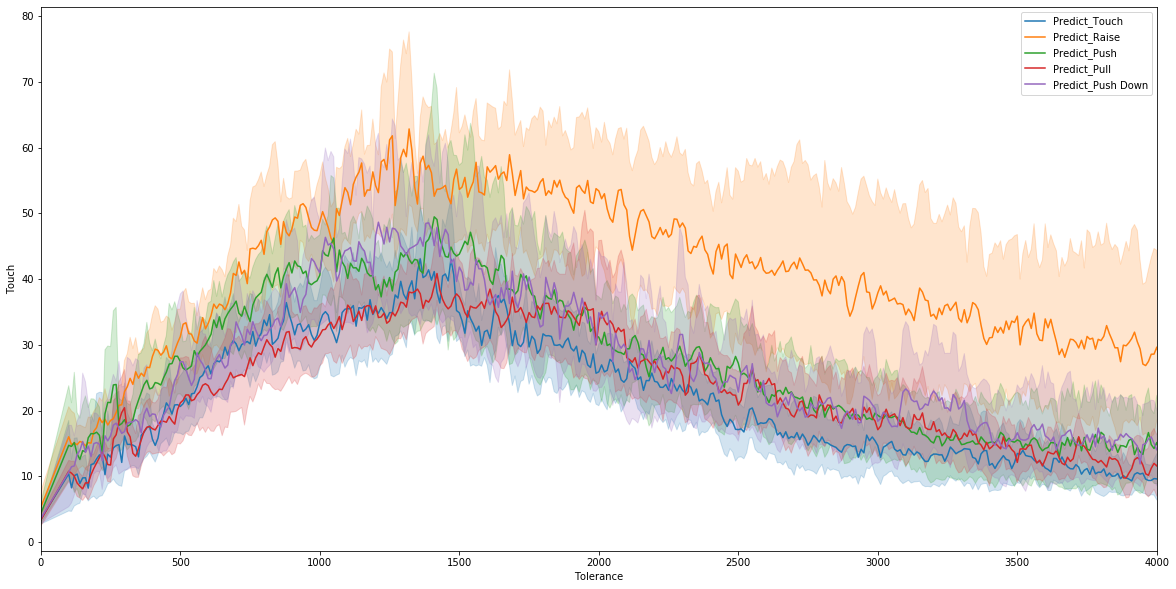

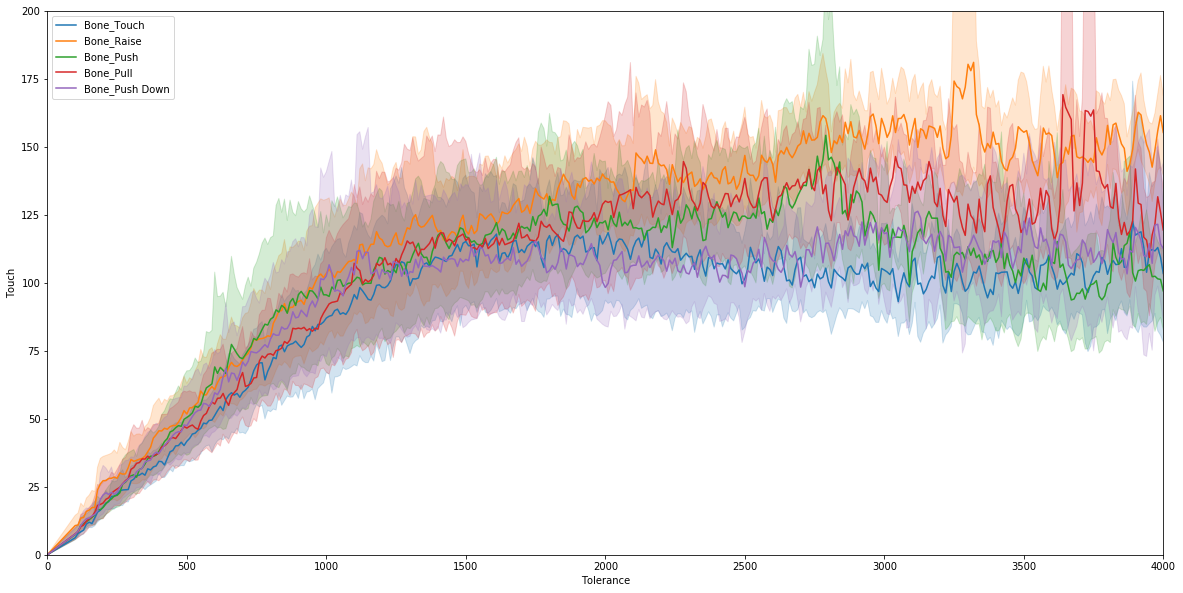

In [48]:
plt.figure(figsize=(20,10))
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Touch', data = analysisPerTask, label = 'Predict_Touch')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Raise', data = analysisPerTask, label = 'Predict_Raise')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push', data = analysisPerTask, label = 'Predict_Push')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Pull', data = analysisPerTask, label = 'Predict_Pull')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push Down', data = analysisPerTask, label = 'Predict_Push Down')
plt.xlim(0,4000)

plt.figure(figsize=(20,10))
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Touch', data = analysisBoneDistPerTask, label = 'Bone_Touch')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Raise', data = analysisBoneDistPerTask, label = 'Bone_Raise')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push', data = analysisBoneDistPerTask, label = 'Bone_Push')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Pull', data = analysisBoneDistPerTask, label = 'Bone_Pull')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push Down', data = analysisBoneDistPerTask, label = 'Bone_Push Down')
plt.xlim(0,4000)
plt.ylim(0,200)



In [26]:
allConfig.head()

Config  DistBoneInTolTime.0  DistBoneInTolTime.100  DistBoneInTolTime.1000  \
0       0                  0.0               2.282057               24.754786   
1       1                  0.0               5.895050               46.828217   
2       2                  0.0               2.202950               16.110625   
3       3                  0.0               2.278050               17.989637   
4       4                  0.0              29.233879              332.416581   

   DistBoneInTolTime.1010  DistBoneInTolTime.1020  DistBoneInTolTime.1030  \
0               24.754786               28.369243               28.319414   
1               46.828217               40.804040               28.674850   
2               19.765600               19.765600               19.765600   
3               19.948657               19.296500               18.214875   
4              335.018162              311.038681              308.564019   

   DistBoneInTolTime.1040  DistBoneInTolTime.1050  DistBoneInTolTime.1060  \
0               27.234886               27.234886               27.234886   
1               47.457233               45.663680               46.769633   
2               21.265875               21.265875               27.099225   
3               18.312813               17.987913               19.870238   
4              308.509313              310.026913              310.249781   

   ...  Speed.920  Speed.930  Speed.940  Speed.950   Speed.960   Speed.970  \
0  ...   5.150637   5.125568   4.133841   5.858170    3.784841    4.077478   
1  ...   2.024532   2.306640   1.351898   0.734950    1.185956   -0.815326   
2  ...   5.670952   5.670952   0.174105   1.725089   11.997836   11.997836   
3  ...  -4.629282  -5.743197  -5.423613  -5.334622   -4.698398   -2.546689   
4  ... -27.391883 -22.250317 -70.158246 -65.917729 -151.534660 -152.216314   

    Speed.980   Speed.990       Task   User  
0    4.199153    5.942600      Touch  User8  
1   -5.667958   -5.667958      Raise  User8  
2   11.997836   11.997836       Pull  User8  
3   -8.214105   -7.239772       Push  User8  
4 -151.790536 -152.600706  Push Down  User8  

[5 rows x 1989 columns]

In [27]:
allConfig['DistInTolTime.0'] = allConfig['DistanceInTolTime.0']
allConfig.loc[allConfig['DistanceInTolTime.0'] <= 0, 'DistInTolTime.0'] = 0
#allConfig.loc[allConfig['DistanceInTolTime.0'] > 0, 'DistInTolTime.0'] = allConfig['DistanceInTolTime.0']
allConfig['AbsSpeed.0'] = abs(allConfig['Speed.0'])

for tol in range(100, 2050, 10):
    allConfig['DistInTolTime.'+str(tol)] = allConfig['DistanceInTolTime.'+str(tol)]
    allConfig.loc[allConfig['DistanceInTolTime.'+str(tol)] <= 0, 'DistInTolTime.'+str(tol)] = 0
    #allConfig.loc[allConfig['DistanceInTolTime.'+str(tol)] > 0, 'DistInTolTime.'+str(tol)] = allConfig['DistanceInTolTime.'+str(tol)]
    allConfig['AbsSpeed.'+str(tol)] = abs(allConfig['Speed.'+str(tol)])

In [79]:
speedTol = pd.DataFrame()
i = 0
speedTol.loc[0, 'AbsSpeed'] = allConfig['AbsSpeed.0'].dropna().mean()
for user in range(0, nbUsers):
    cond = allConfig['User'] == list_names[user]
    speedTol.loc[0, list_names[user]] = allConfig[cond]['AbsSpeed.0'].dropna().mean()
    for tol in range(300, 2050, 50):
        speedTol.loc[tol, 'AbsSpeed'] = allConfig['AbsSpeed.'+str(tol)].dropna().mean()
        speedTol.loc[tol, list_names[user]] = allConfig[cond]['AbsSpeed.'+str(tol)].dropna().mean()
    
    

In [80]:
speedTol

AbsSpeed       User1      User3       User4      User5      User6  \
0      7.881755   12.355268   6.996243   11.204753   8.103110   6.150158   
300   40.414864   34.615686  38.764067   34.515667  24.386546  33.426171   
350   39.837897   23.526222  39.834555   36.052058  24.187953  36.262120   
400   41.627965   35.391012  37.338943   38.130377  24.020446  38.229923   
450   41.929064   37.331066  36.954953   38.487740  25.724475  38.250543   
500   43.998091   46.522731  35.841135   42.718344  27.824858  37.200153   
550   45.286962   57.620135  35.010060   43.651442  25.805966  37.929011   
600   47.540023   72.092979  34.819537   42.774143  23.624638  41.715365   
650   47.672905   57.227475  35.736138   50.690414  26.677903  40.830198   
700   50.005307   68.971516  40.293326   48.532215  26.343714  41.945280   
750   51.982435   68.959256  38.147024   54.175036  28.660415  48.018146   
800   54.633127   86.101407  41.100533   52.965852  27.279671  43.378110   
850   51.410472   73.906342  43.052872   53.154524  29.276414  40.500255   
900   52.405695   74.226513  48.685508   50.742916  28.722960  40.840729   
950   64.600145  138.423945  48.985632   59.212599  26.754958  42.908219   
1000  57.806386  102.846725  51.957709   62.628468  25.218437  41.270721   
1050  52.689598   71.974949  53.003214   63.346372  24.448759  36.295854   
1100  60.050770   98.927720  52.223598   65.183252  24.221564  39.922309   
1150  54.814793   75.677497  52.965658   71.930657  21.317111  40.122648   
1200  56.111625   92.326740  54.004208   65.037526  22.337565  35.058282   
1250  55.884269   90.837332  57.736283   59.073878  21.553349  37.859554   
1300  57.047607   98.872063  58.197052   59.043387  24.161951  38.432961   
1350  54.964839   73.556330  58.844555   78.241081  22.046145  35.494639   
1400  52.649795   56.155528  58.455509   77.953115  23.930753  36.929000   
1450  51.464504   38.768976  56.445741   94.035929  21.288913  32.013132   
1500  56.187813  102.838609  58.336840   79.686020  22.301679  33.097958   
1550  52.484355   66.481004  54.755863   85.465490  23.352100  35.386032   
1600  51.264418   58.310456  55.630360   91.457897  22.939191  33.758288   
1650  54.554133   71.129032  58.739744   94.903095  24.978621  33.985231   
1700  52.116405   57.523020  53.730640  100.073096  22.321434  36.793344   
1750  52.484727   97.537892  58.045667   66.552180  21.637093  33.985991   
1800  54.759635   87.906037  54.360330   75.676011  23.933925  34.307502   
1850  53.330557   76.030678  57.878275   87.188734  25.522080  36.416573   
1900  51.888728   63.875236  57.350825   74.311586  28.435428  34.073602   
1950  53.566605   65.119645  58.754994   86.045744  27.227141  37.469828   
2000  55.990151   94.167359  56.868986   73.626360  29.248140  35.136264   

          User7      User8  
0      5.348981   5.059137  
300   64.811186  53.347182  
350   71.635430  48.994186  
400   67.702266  51.117423  
450   68.626177  49.318204  
500   69.357909  49.131294  
550   70.719919  47.386396  
600   71.402764  47.669283  
650   73.516144  49.701789  
700   65.318402  59.663394  
750   71.180988  55.235202  
800   73.681223  58.816315  
850   64.894548  55.929511  
900   67.859372  56.915770  
950   72.838982  63.542623  
1000  64.445282  56.818366  
1050  70.934240  49.654904  
1100  66.467692  75.391216  
1150  71.300701  52.349547  
1200  69.592486  55.517484  
1250  69.423581  56.743144  
1300  68.955981  53.934288  
1350  67.333453  54.386048  
1400  64.567973  53.927245  
1450  60.812158  61.532770  
1500  56.813690  48.461804  
1550  54.534500  53.017831  
1600  52.473497  51.846741  
1650  50.827115  54.628230  
1700  53.553285  52.507832  
1750  53.557050  44.790656  
1800  60.648221  54.281391  
1850  54.082790  47.755155  
1900  53.074569  57.959721  
1950  58.256524  51.962338  
2000  54.170241  60.689577

(0, 200)

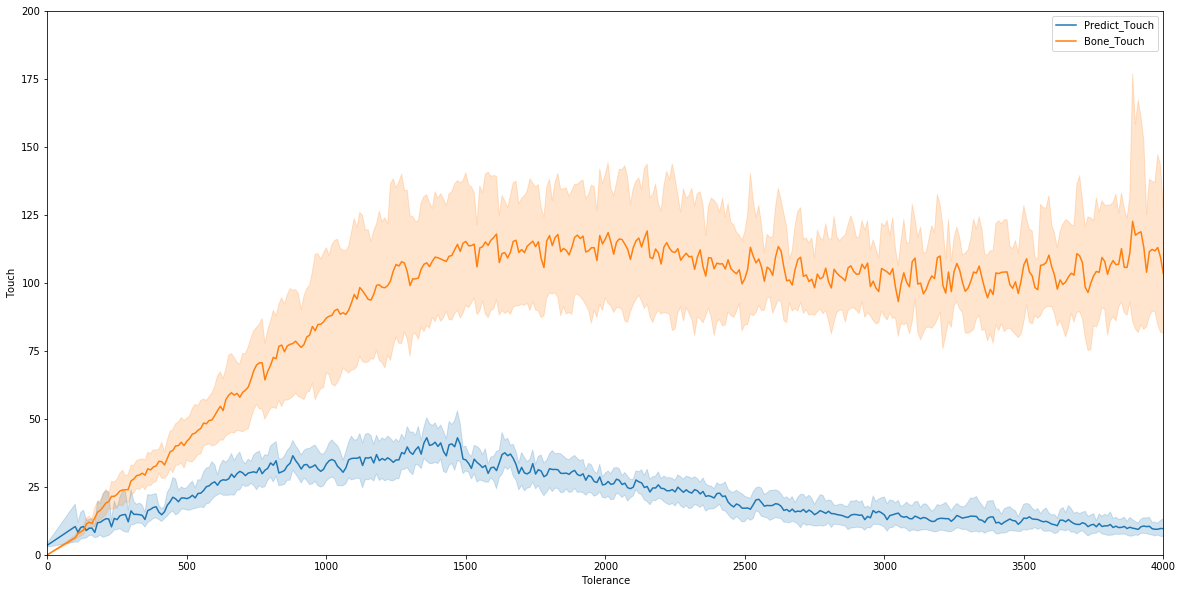

In [65]:
plt.figure(figsize=(20,10))
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Touch', data = analysisPerTask, label = 'Predict_Touch')
#alphaplot = sns.lineplot(x = 'Tolerance', y = 'Raise', data = analysisPerTask, label = 'Predict_Raise')
#alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push', data = analysisPerTask, label = 'Predict_Push')
#alphaplot = sns.lineplot(x = 'Tolerance', y = 'Pull', data = analysisPerTask, label = 'Predict_Pull')
#alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push Down', data = analysisPerTask, label = 'Predict_Push Down')

alphaplot = sns.lineplot(x = 'Tolerance', y = 'Touch', data = analysisBoneDistPerTask, label = 'Bone_Touch')
#alphaplot = sns.lineplot(x = 'Tolerance', y = 'Raise', data = analysisBoneDistPerTask, label = 'Bone_Raise')
#alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push', data = analysisBoneDistPerTask, label = 'Bone_Push')
#alphaplot = sns.lineplot(x = 'Tolerance', y = 'Pull', data = analysisBoneDistPerTask, label = 'Bone_Pull')
#alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push Down', data = analysisBoneDistPerTask, label = 'Bone_Push Down')

#alphaplot = sns.lineplot(x = speedTol.index, y = 'AbsSpeed', data = speedTol, label = 'MeanSpeed')
plt.xlim(0,4000)
plt.ylim(0,200)

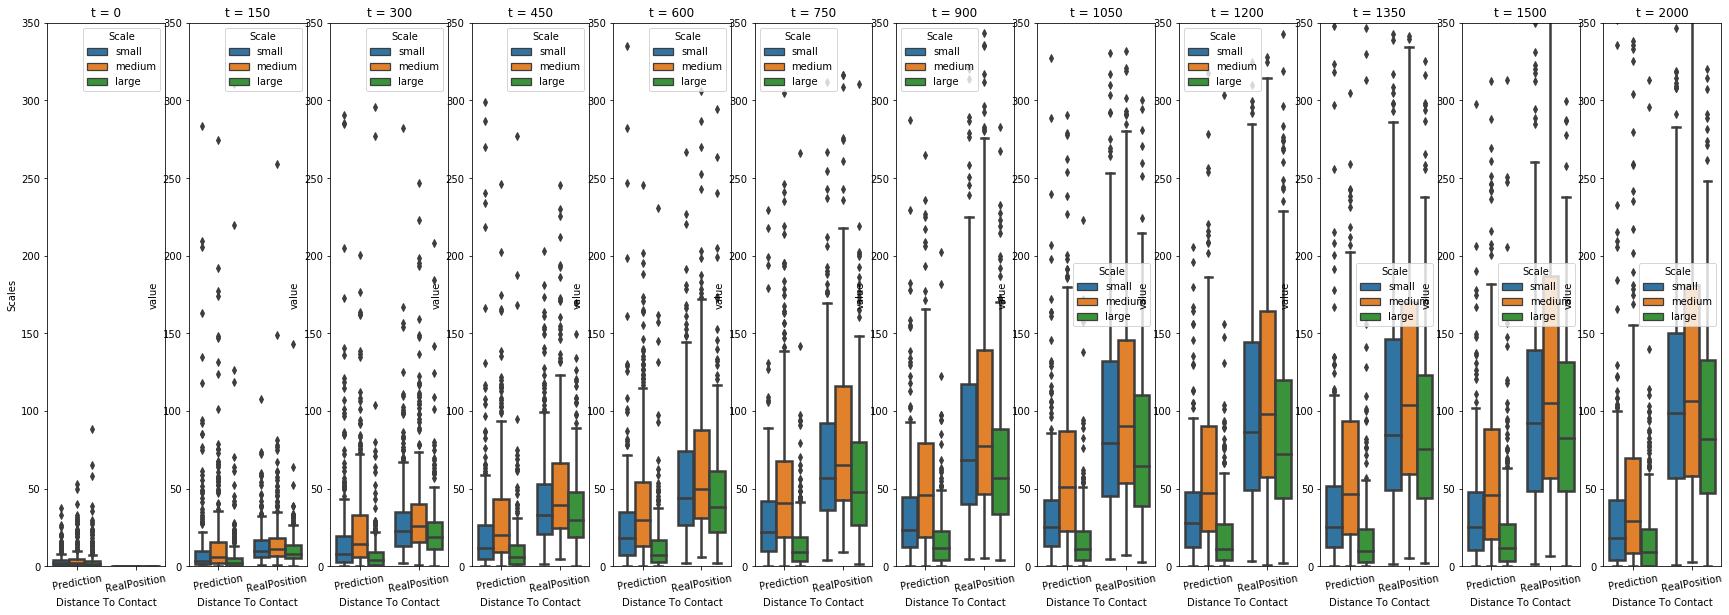

In [30]:
nameAx = []
nameFig = []
#tolTime = [0, 300, 500, 750, 1000, 1250, 1500, 2000]
tolTime = [0, 150, 300, 450, 600, 750, 900, 1050, 1200, 1350, 1500, 2000]
lim = [50, 150, 300, 300, 300, 300, 400, 400, 400, 500, 500, 500]
for i in range(0, len(tolTime)):
    nameAx.append('ax'+str(i))
    nameFig.append('g'+str(i))
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))



for i in range(0, len(tolTime)):

    mdf = pd.DataFrame()
    cdf = pd.DataFrame()
    df1 = pd.DataFrame()
    df2 = pd.DataFrame()
    df1 = pd.DataFrame(allConfig['DistInTolTime.'+str(tolTime[i])]).assign(Trial=1)
    df1['Scale'] = allConfig['Scale']
    df2 = pd.DataFrame(allConfig['DistBoneInTolTime.'+str(tolTime[i])]).assign(Trial=2)
    df2['DistInTolTime.'+str(tolTime[i])] = allConfig['DistBoneInTolTime.'+str(tolTime[i])]
    df2['Scale'] = allConfig['Scale']
    df2.assign(Trial=2)
    cdf = pd.concat([df1, df2], sort = False)                                # CONCATENATE
    mdf = pd.melt(cdf, id_vars=['Trial','Scale'],value_vars='DistInTolTime.'+str(tolTime[i]), var_name = 'DistInTolTime.'+str(tolTime[i]))

    nameFig[i] = sns.boxplot(x="Trial", y="value", hue = 'Scale', data=mdf, linewidth = 2.5, ax = nameAx[i])  # RUN PLOT   
    #nameFig[i] = sns.boxplot(x = "Scale", y = 'DistInTolTime.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])

    #, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Scales')
    nameFig[i].set_xlabel('Distance To Contact')#, t ='+str(tolTime[i]))
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    #nameFig[i].set_ylim(0, lim[i])
    
for ax in nameFig:
    tl = ['Prediction', 'RealPosition']#ax.get_xticklabels()#['Prediction/Contact', 'RealPosition/Contact'])
    ax.set_xticklabels(tl, rotation=10)
    ax.set_ylim(0, 350)


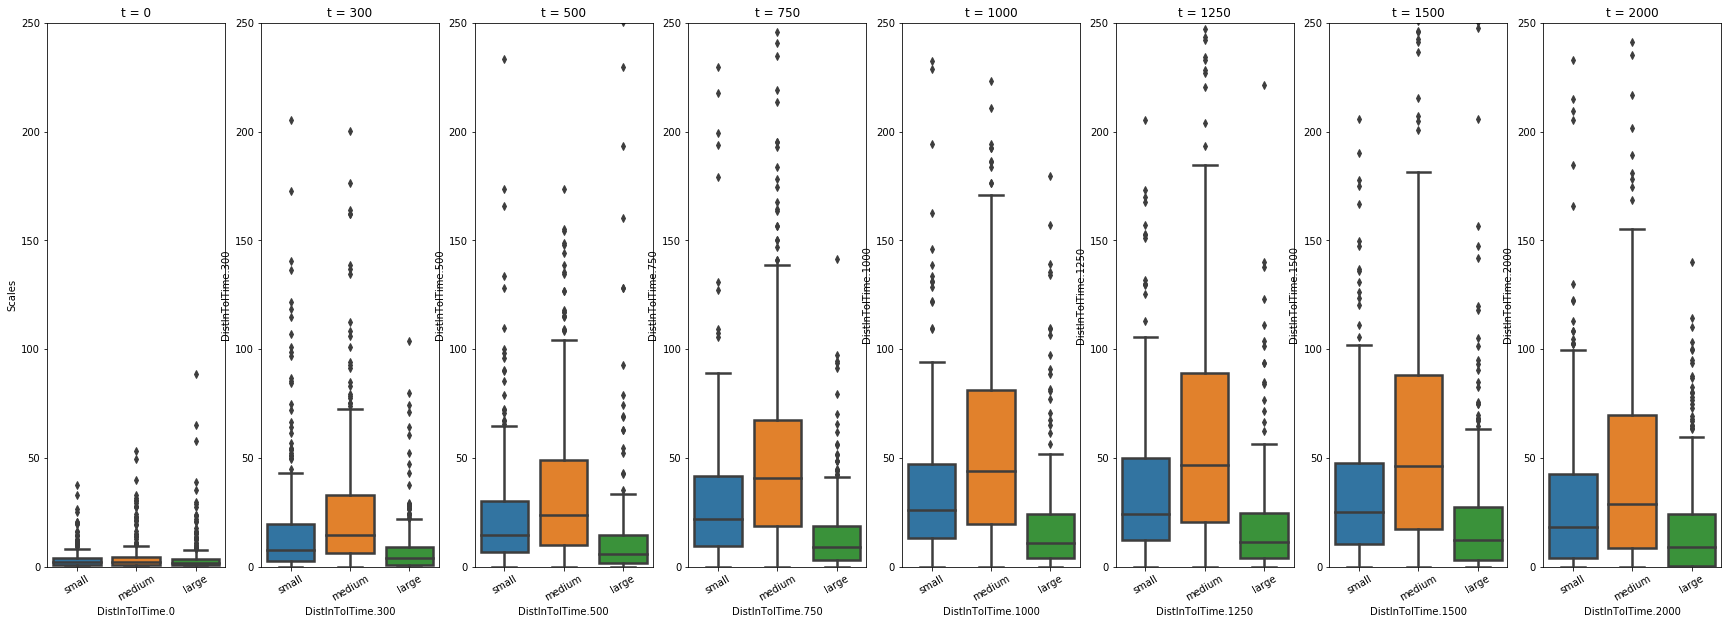

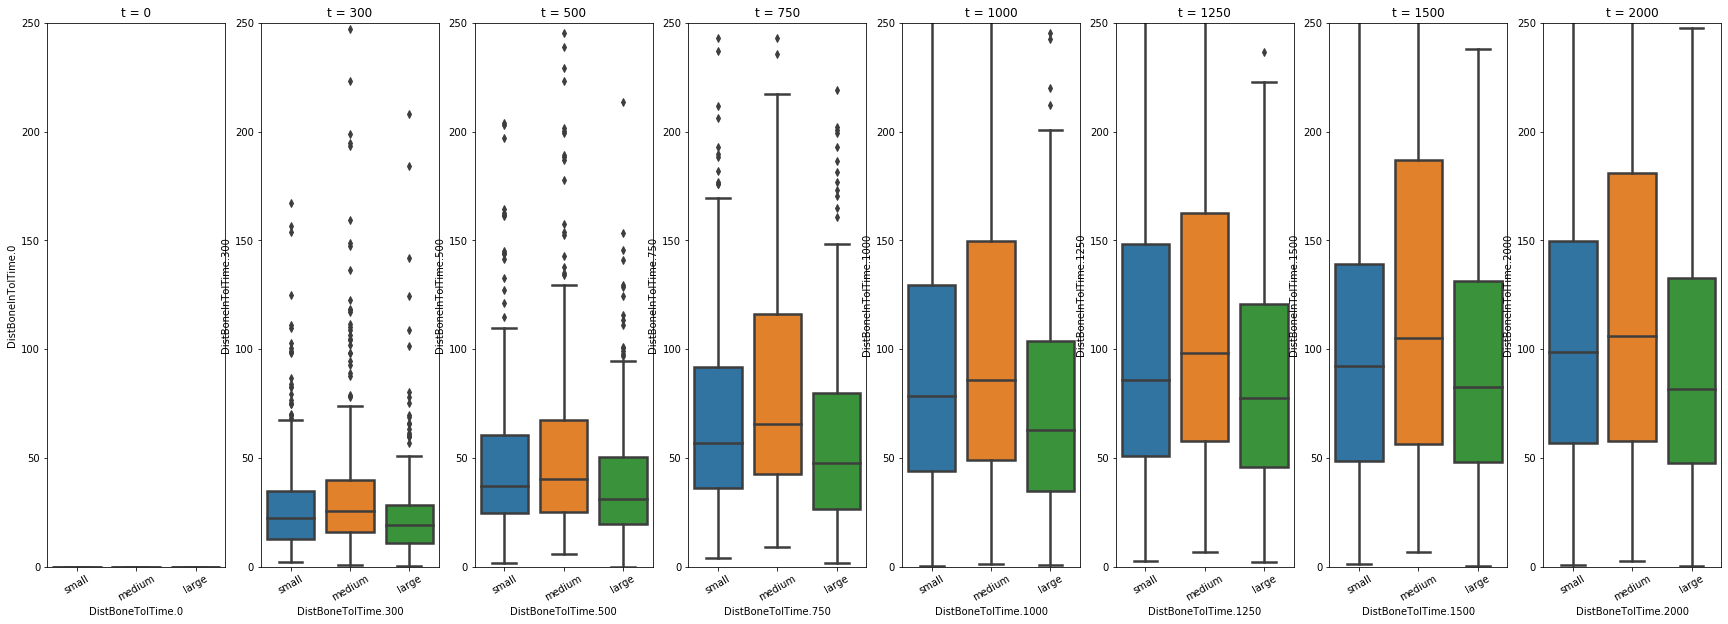

In [31]:
nameAx = []
nameFig = []
tolTime = [0, 300, 500, 750, 1000, 1250, 1500, 2000]

for i in range(0, len(tolTime)):
    nameAx.append('ax'+str(i))
    nameFig.append('g'+str(i))
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))



for i in range(0, len(tolTime)):
            
    nameFig[i] = sns.boxplot(x = "Scale", y = 'DistInTolTime.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])

    #, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Scales')
    nameFig[i].set_xlabel('DistInTolTime.'+str(tolTime[i]))
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    ax.set_ylim(0, 250)
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))



for i in range(0, len(tolTime)):
            
    nameFig[i] = sns.boxplot(x = "Scale", y = 'DistBoneInTolTime.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    #nameFig[0].set_ylabel('Scales')
    nameFig[i].set_xlabel('DistBoneTolTime.'+str(tolTime[i]))
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    ax.set_ylim(0, 250)


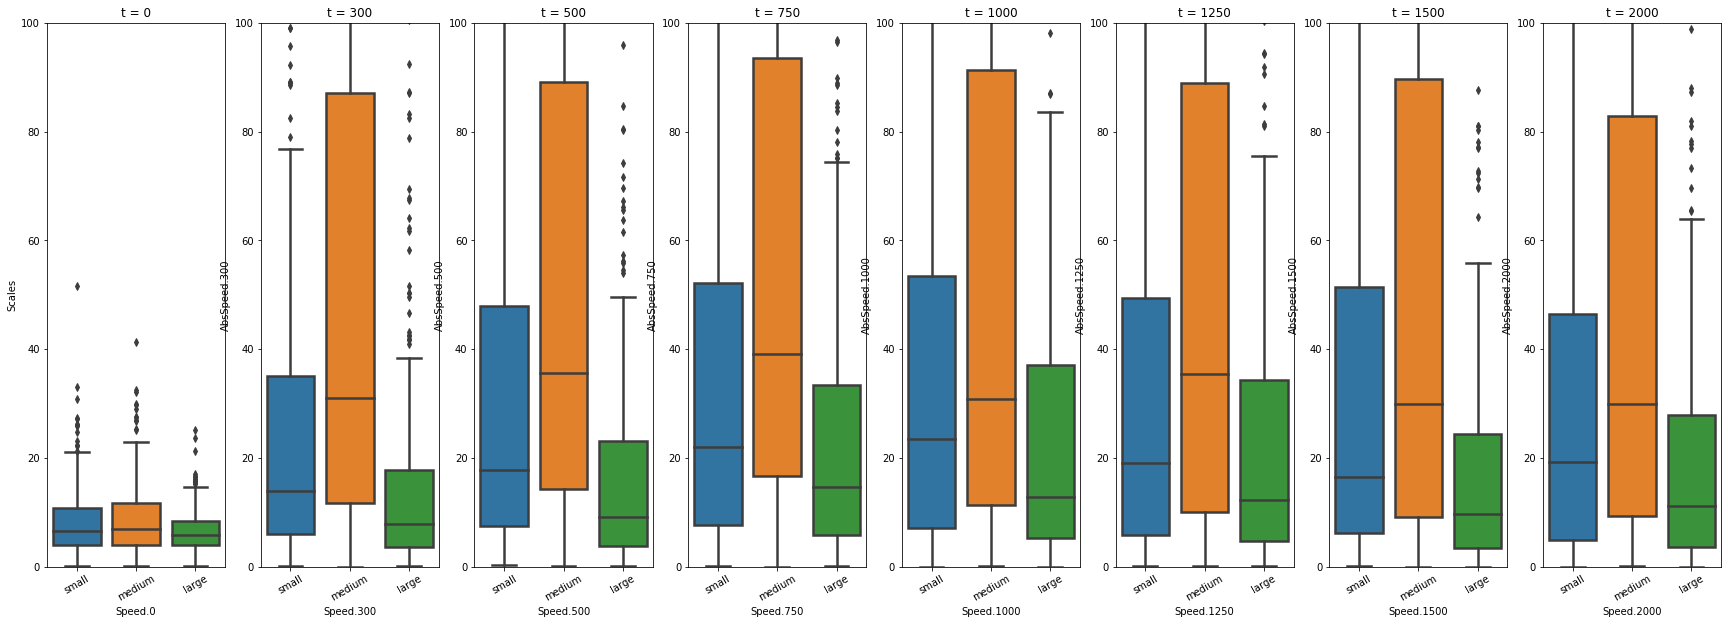

In [32]:
nameAx = []
nameFig = []
tolTime = [0, 300, 500, 750, 1000, 1250, 1500, 2000]

for i in range(0, len(tolTime)):
    nameAx.append('ax'+str(i))
    nameFig.append('g'+str(i))
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))

for i in range(0, len(tolTime)):
            
    nameFig[i] = sns.boxplot(x = "Scale", y = 'AbsSpeed.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])
    #nameFig[i] = sns.lineplot(x = i, y = 'AbsSpeed.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])

    
    #, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Scales')
    nameFig[i].set_xlabel('Speed.'+str(tolTime[i]))
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    ax.set_ylim(0, 100)

    

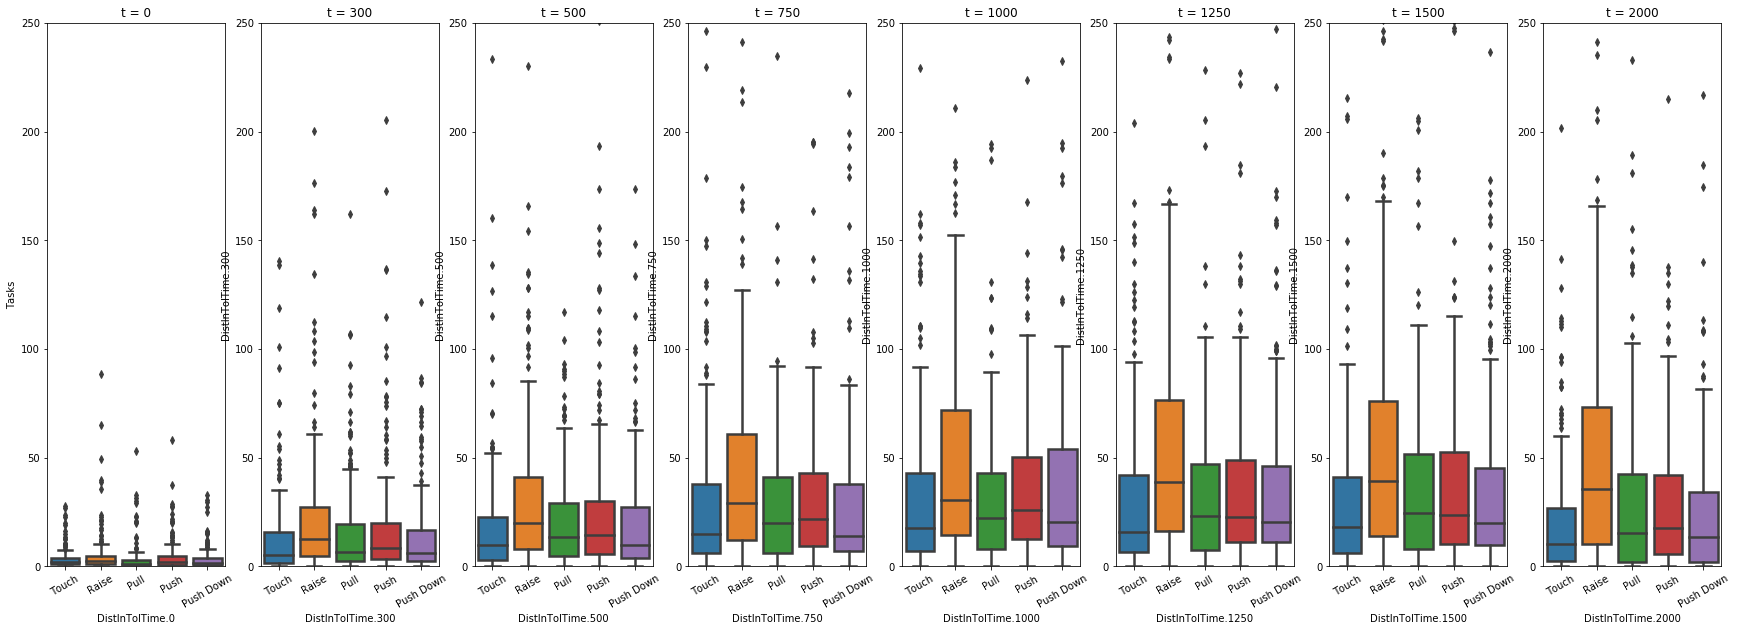

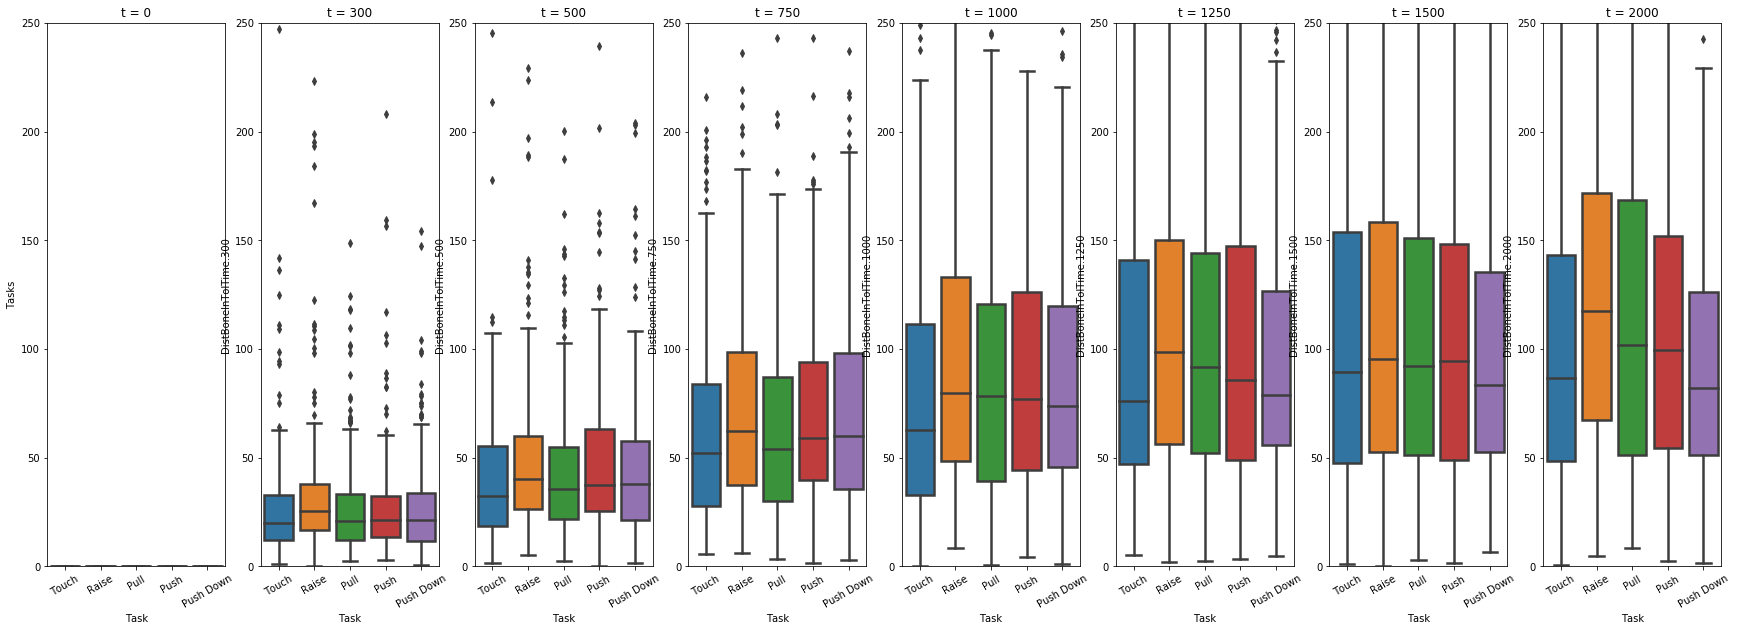

In [33]:
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))



for i in range(0, len(tolTime)):
            
    nameFig[i] = sns.boxplot(x = "Task", y = 'DistInTolTime.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Tasks')
    nameFig[i].set_xlabel('DistInTolTime.'+str(tolTime[i]))
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    ax.set_ylim(0, 250)

    
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))

for i in range(0, len(tolTime)):
            
    nameFig[i] = sns.boxplot(x = "Task", y = 'DistBoneInTolTime.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Tasks')
    #nameFig[i].set_xlabel('DistInTolTime.'+str(tolTime[i]))
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    ax.set_ylim(0, 250)


In [34]:
allConfig['Obj'].iloc[77], allConfig['Scale'].iloc[77], allConfig['Task'].iloc[77]

('obj6', 'medium', 'Push')

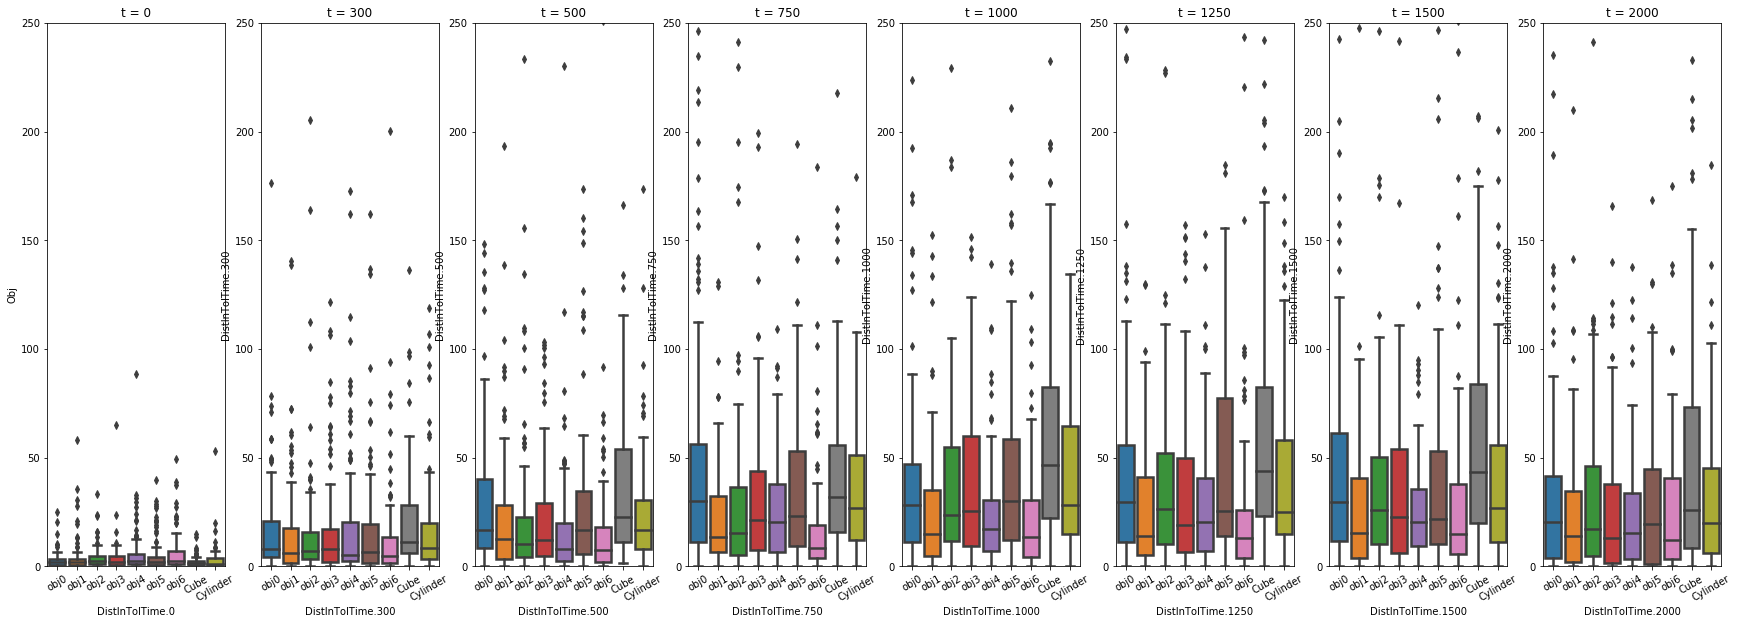

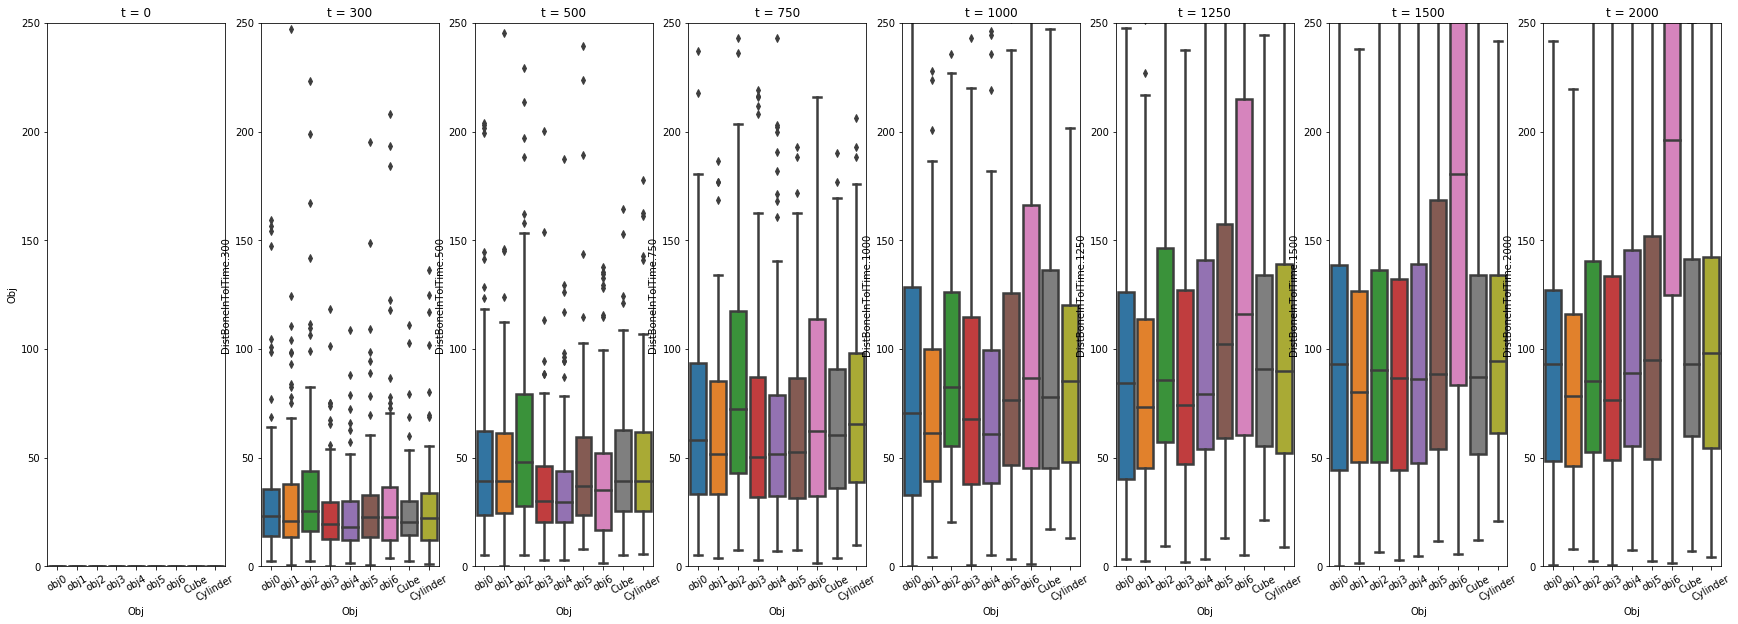

In [35]:
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))



for i in range(0, len(tolTime)):
            
    nameFig[i] = sns.boxplot(x = "Obj", y = 'DistInTolTime.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Obj')
    nameFig[i].set_xlabel('DistInTolTime.'+str(tolTime[i]))
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    ax.set_ylim(0, 250)
    
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))

for i in range(0, len(tolTime)):
            
    nameFig[i] = sns.boxplot(x = "Obj", y = 'DistBoneInTolTime.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Obj')
    #nameFig[i].set_xlabel('DistInTolTime.'+str(tolTime[i]))
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    ax.set_ylim(0, 250)


In [36]:
taskScale = pd.DataFrame()

tol = 300
for size in range(0, len(scales)):
    for gest in range (0, len(tasks)):
        #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
        mean = 0
        for users in range(0, nbUsers):
            cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size]) & (allConfig['User'] == list_names[users])            
            mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

        taskScale.loc[scales[size], tasks[gest]] = mean/nbUsers
        
        
taskObj = pd.DataFrame()        
for obj in range(0, len(objects)):
    for gest in range (0, len(tasks)):
        #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
        mean = 0
        for users in range(0, nbUsers):
            cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users])            
            mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

        taskObj.loc[objects[obj], tasks[gest]] = mean/nbUsers
        
        
scaleObj = pd.DataFrame()        
for obj in range(0, len(objects)):
    for size in range (0, len(scales)):
        #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
        mean = 0
        for users in range(0, nbUsers):
            cond = (allConfig['Scale'] == scales[size]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users])            
            mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

        scaleObj.loc[scales[size], objects[obj]] = mean/nbUsers

In [37]:
taskObj

Touch      Raise       Pull       Push  Push Down
obj0      10.293683  23.554739  10.195566  21.898058  30.856140
obj1      22.125155  12.104331  17.819021  12.431537  12.564942
obj2      11.894006  26.329663  20.959916  21.043894  22.980427
obj3      27.319368  18.895391  40.611889  16.781891  19.412074
obj4      18.796716  23.595421  27.555961  29.603709  10.272347
obj5      17.748134  30.700679  13.486210  19.434699   8.130177
obj6       3.446185  29.785951  15.645755   6.915587   8.693201
Cube      13.273349  27.223146  17.533521  24.340817  21.537218
Cylinder  20.610000  13.700199  19.850500  15.515570  16.939572

In [38]:
taskScale

Touch      Raise       Pull       Push  Push Down
small   17.685781  16.485796  17.707304  26.072205  20.926242
medium  20.750014  38.708604  28.346548  21.542238  19.243204
large   10.066403  13.489201  15.540004   8.483704  10.292586

In [39]:
scaleObj

obj0       obj1       obj2       obj3       obj4       obj5  \
small   21.193329  15.756851  25.754845  20.697842  19.357302  13.502338   
medium  30.624931  22.286051  22.505625  28.615132  24.695055  33.443811   
large    6.260650   8.398353  13.664273  24.499393  21.842135   6.753791   

             obj6       Cube   Cylinder  
small    8.132341  29.435684  24.089907  
medium  24.487752  24.655525  19.769152  
large    6.071914   8.530441   8.148467

# Scales and Tasks

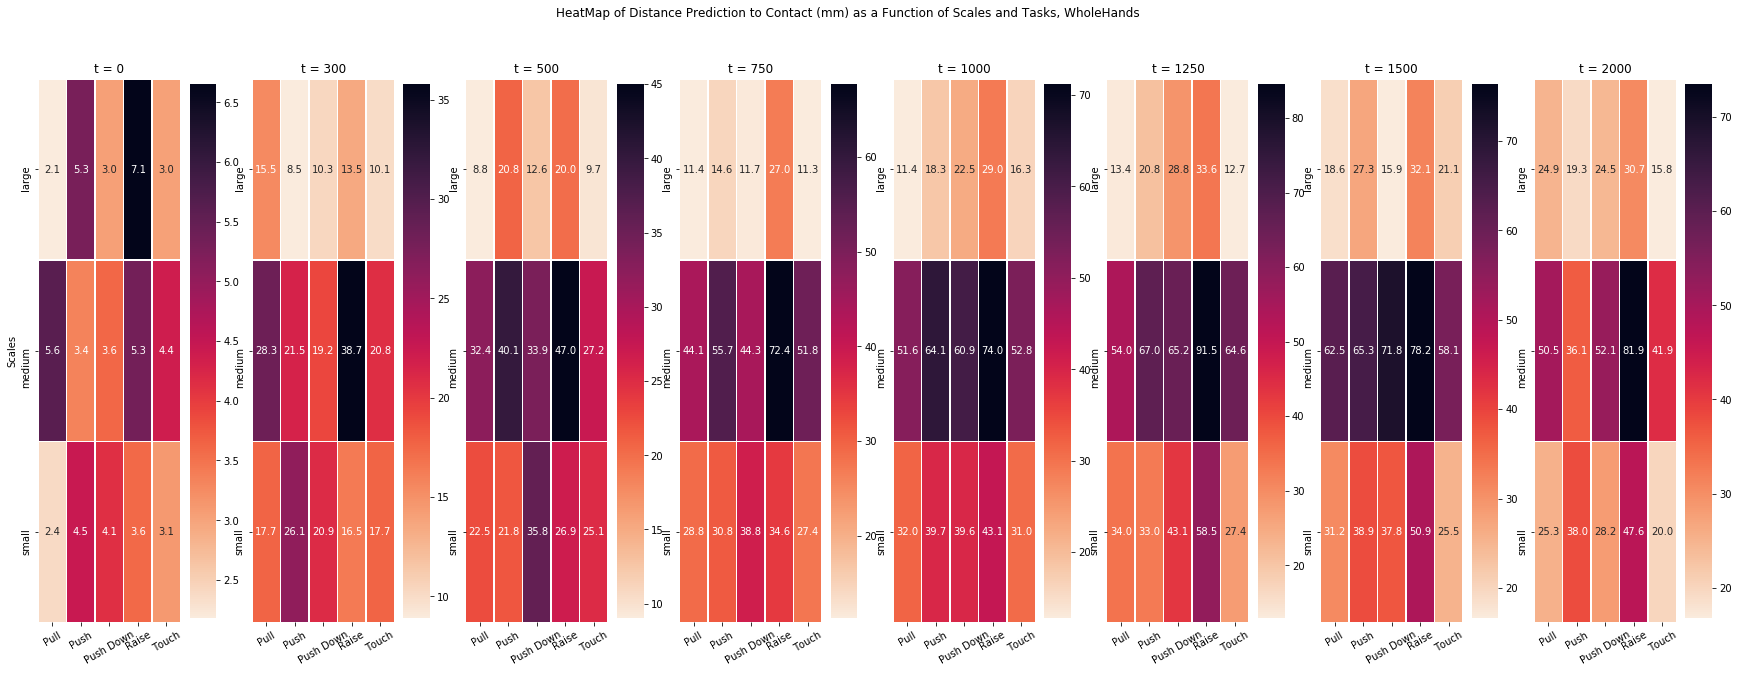

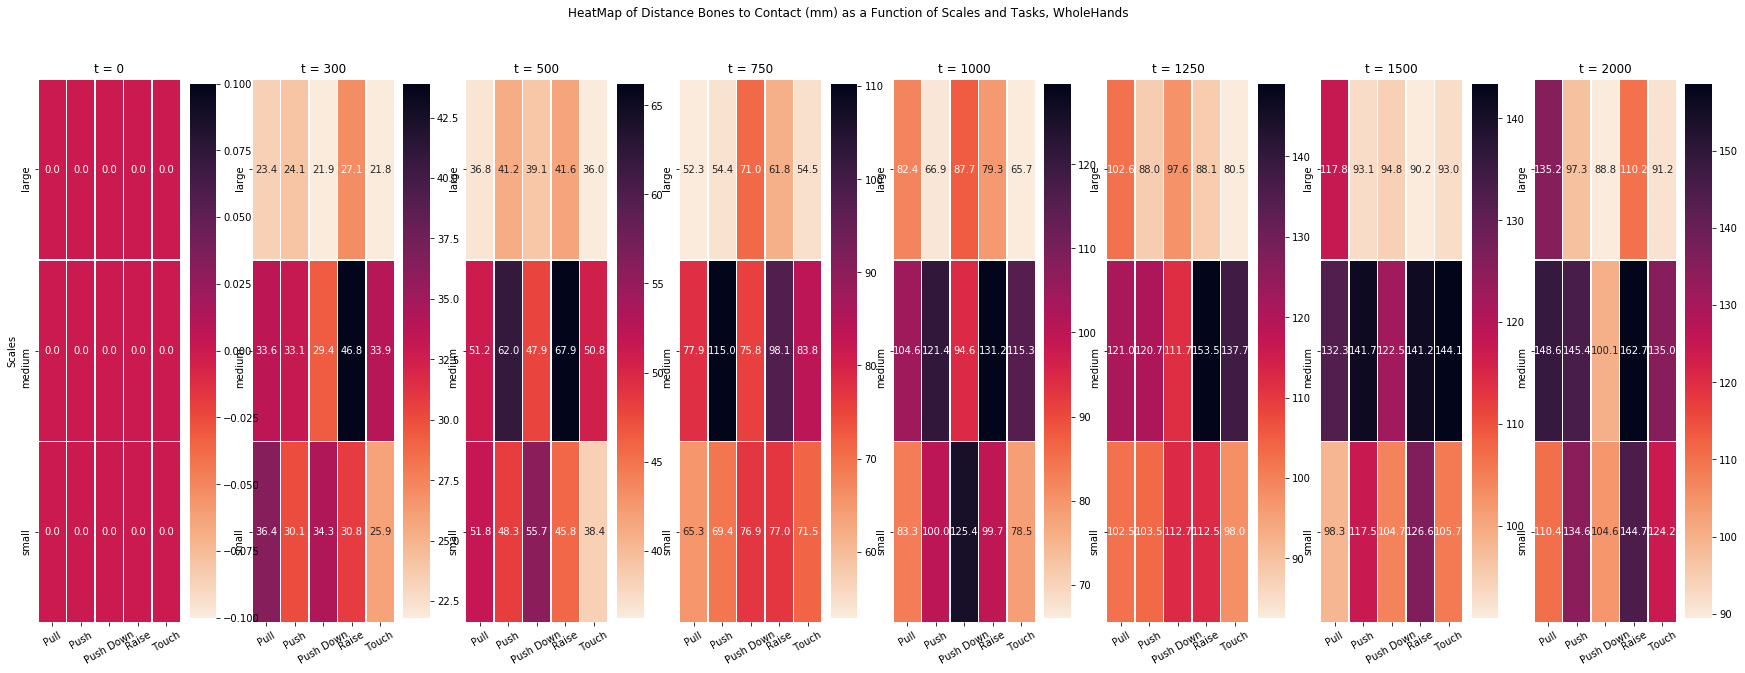

In [40]:
nameAx = []
nameFig = []
tolTime = [0, 300, 500, 750, 1000, 1250, 1500, 2000]
#tolTime = [0, 100, 200, 300, 400, 500, 600, 750, 1000, 1250, 1500, 2000]

for i in range(0, len(tolTime)):
    nameAx.append('ax'+str(i))
    nameFig.append('g'+str(i))
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))

cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    
    taskScale = pd.DataFrame()

    tol = tolTime[i]
    for size in range(0, len(scales)):
        for gest in range (0, len(tasks)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size]) & (allConfig['User'] == list_names[users])            
                mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

            taskScale.loc[scales[size], tasks[gest]] = mean/nbUsers
            
    nameFig[i] = sns.heatmap(taskScale.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Scales')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    
f.suptitle('HeatMap of Distance Prediction to Contact (mm) as a Function of Scales and Tasks, WholeHands')    
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))
cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    
    taskScale = pd.DataFrame()

    tol = tolTime[i]
    for size in range(0, len(scales)):
        for gest in range (0, len(tasks)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size]) & (allConfig['User'] == list_names[users])            
                mean += allConfig[cond]['DistBoneInTolTime.'+str(tol)].mean()

            taskScale.loc[scales[size], tasks[gest]] = mean/nbUsers
            
    nameFig[i] = sns.heatmap(taskScale.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Scales')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)

f.suptitle('HeatMap of Distance Bones to Contact (mm) as a Function of Scales and Tasks, WholeHands')

plt.show()

In [41]:

tol = 300
scaleObj = pd.DataFrame()        
for obj in range(0, len(objects)):
    for size in range (0, len(scales)):
        #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
        mean = 0
        for users in range(0, nbUsers):
            cond = (allConfig['Scale'] == scales[size]) & (allConfig['Obj'] == 'obj6') & (allConfig['User'] == list_names[users])            
            mean += allConfig[cond]['DistInTolTime.'+str(tol)]
            

# Scales and Objects

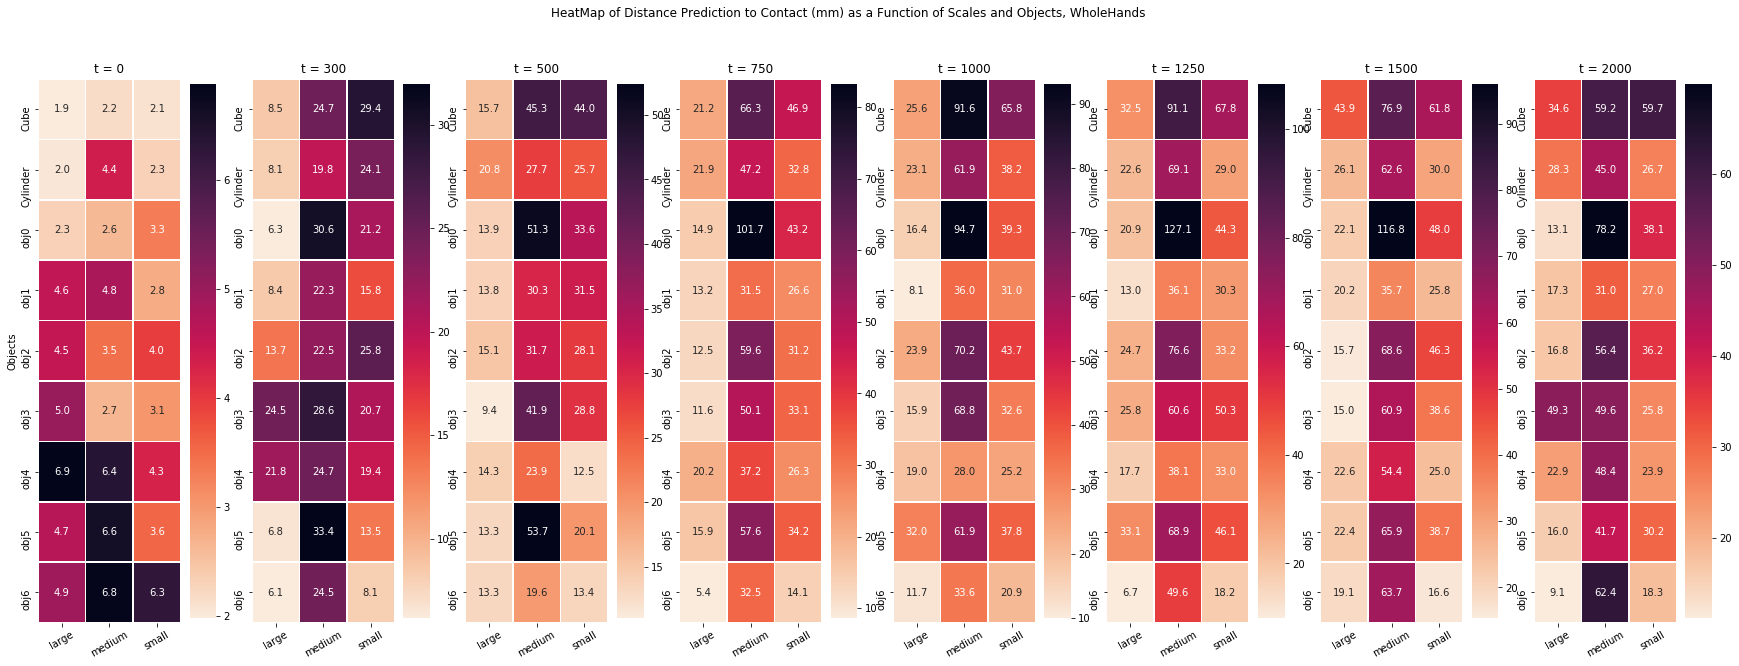

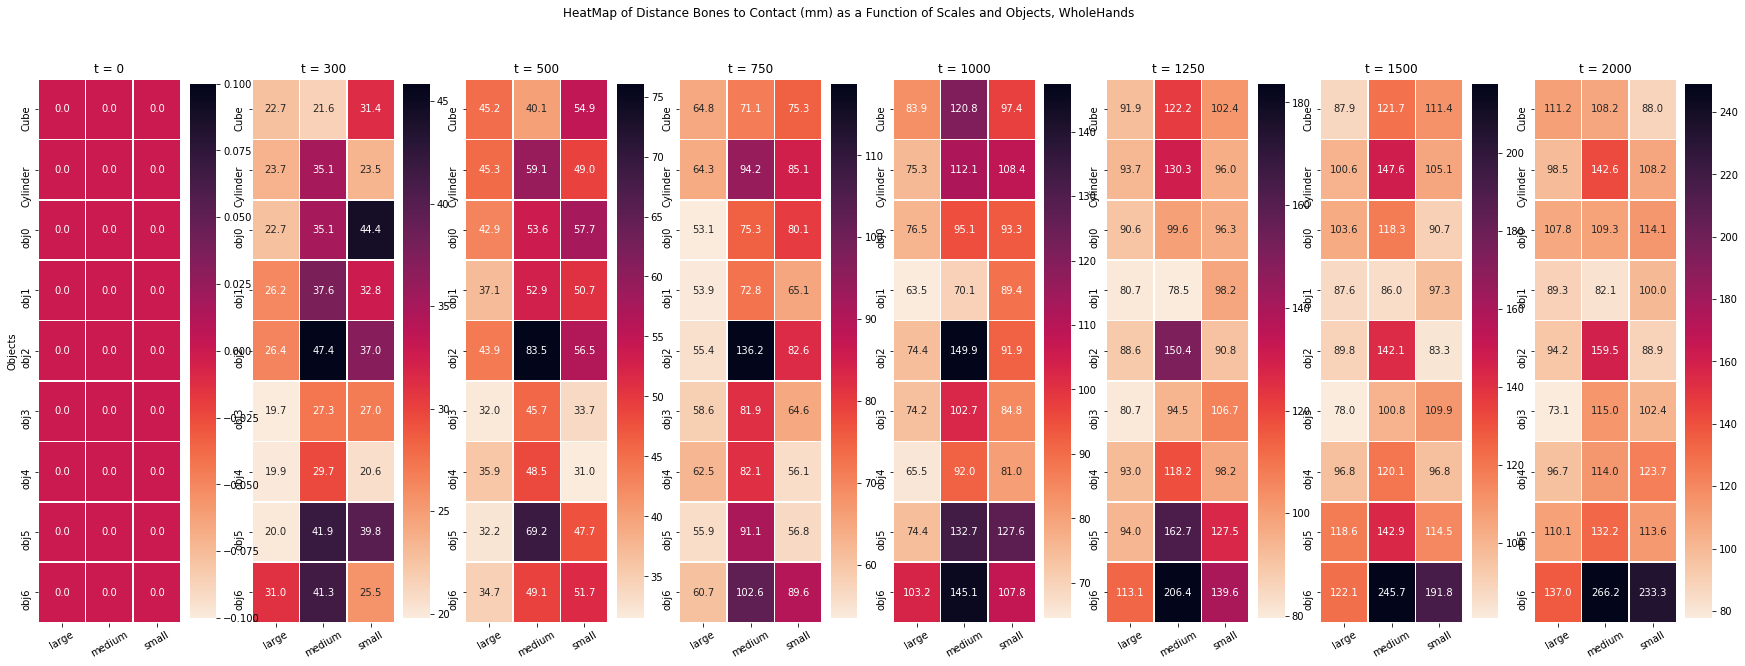

In [42]:
nameAx = []
nameFig = []
tolTime = [0, 300, 500, 750, 1000, 1250, 1500, 2000]

for i in range(0, len(tolTime)):
    nameAx.append('ax'+str(i))
    nameFig.append('g'+str(i))
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))

cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    
    tol = tolTime[i]
    scaleObj = pd.DataFrame()        
    for obj in range(0, len(objects)):
        for size in range (0, len(scales)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (allConfig['Scale'] == scales[size]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users])            
                mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

            scaleObj.loc[objects[obj], scales[size]] = mean/nbUsers        
            
    nameFig[i] = sns.heatmap(scaleObj.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Objects')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    
f.suptitle('HeatMap of Distance Prediction to Contact (mm) as a Function of Scales and Objects, WholeHands')    
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))
cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    tol = tolTime[i]

    scaleObj = pd.DataFrame()        
    for obj in range(0, len(objects)):
        for size in range (0, len(scales)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (allConfig['Scale'] == scales[size]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users])            
                mean += allConfig[cond]['DistBoneInTolTime.'+str(tol)].mean()

            scaleObj.loc[objects[obj], scales[size]] = mean/nbUsers
            
    nameFig[i] = sns.heatmap(scaleObj.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Objects')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)

f.suptitle('HeatMap of Distance Bones to Contact (mm) as a Function of Scales and Objects, WholeHands')

plt.show()

# Tasks and Objects

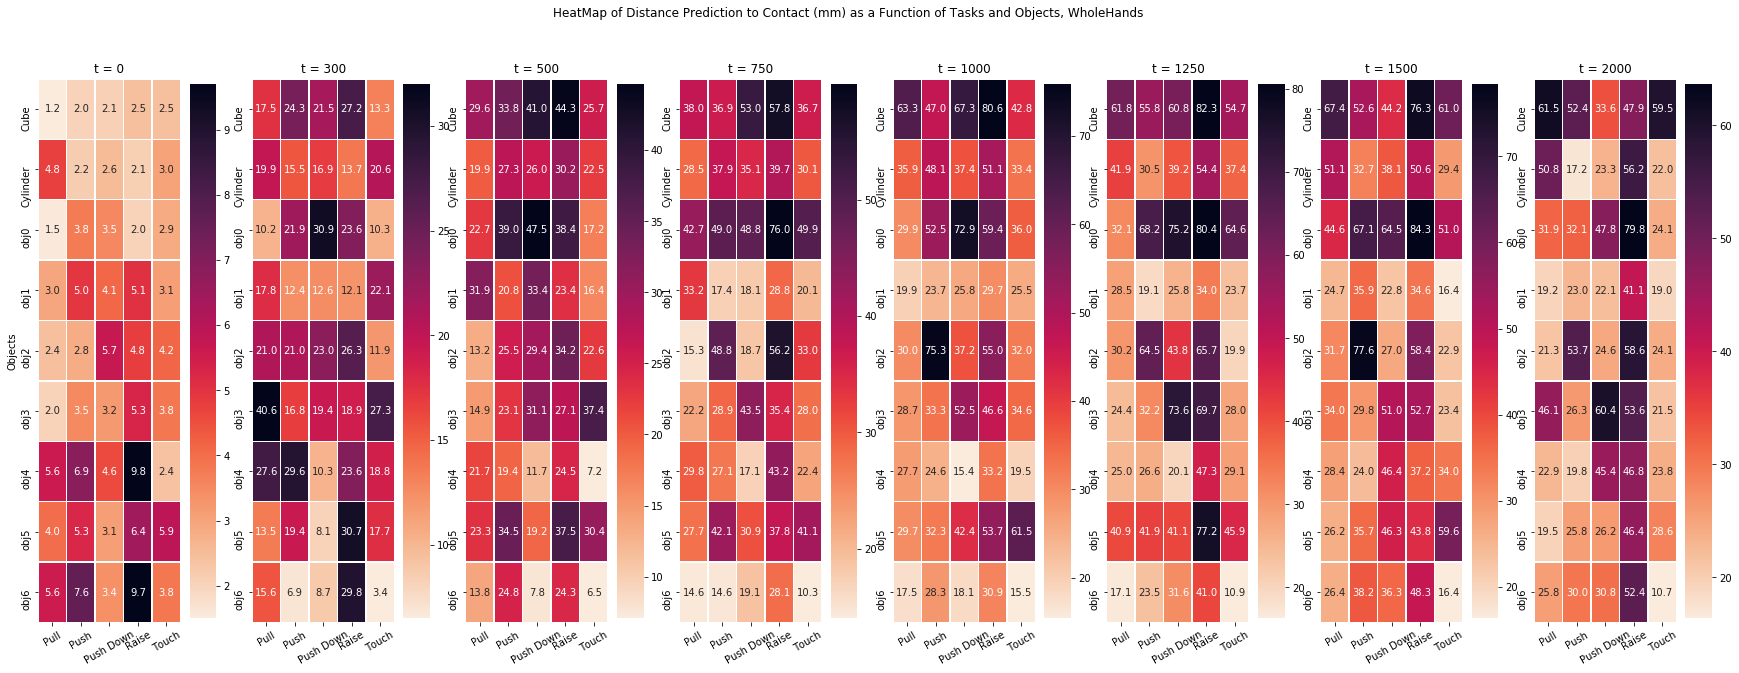

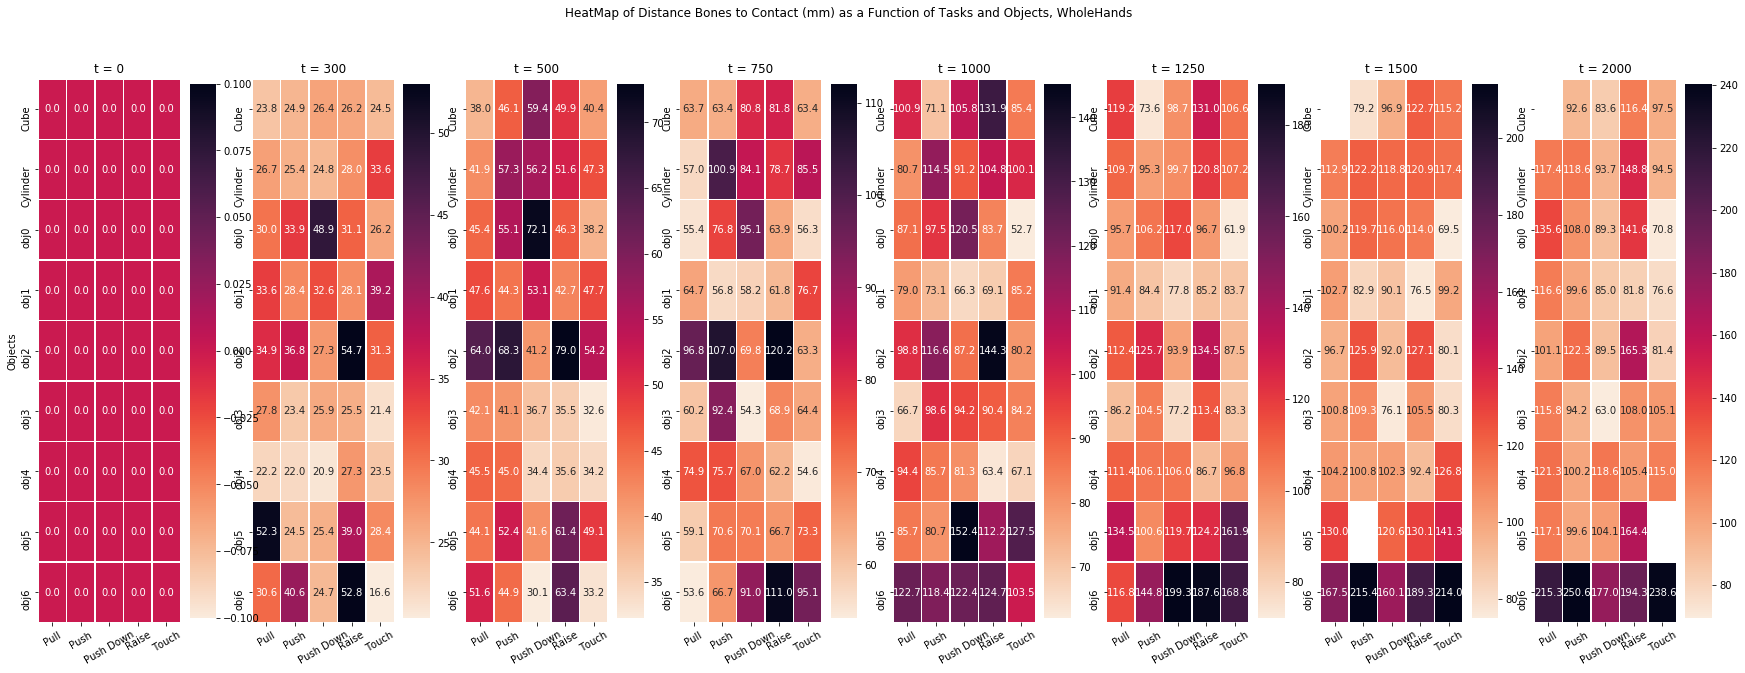

In [43]:
nameAx = []
nameFig = []
tolTime = [0, 300, 500, 750, 1000, 1250, 1500, 2000]

for i in range(0, len(tolTime)):
    nameAx.append('ax'+str(i))
    nameFig.append('g'+str(i))
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))

cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    
    tol = tolTime[i]
    taskObj = pd.DataFrame()        
    for obj in range(0, len(objects)):
        for gest in range (0, len(tasks)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users])            
                mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

            taskObj.loc[objects[obj], tasks[gest]] = mean/nbUsers
            
    nameFig[i] = sns.heatmap(taskObj.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Objects')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    
f.suptitle('HeatMap of Distance Prediction to Contact (mm) as a Function of Tasks and Objects, WholeHands')    
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))
cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    tol = tolTime[i]

    taskObj = pd.DataFrame()        
    for obj in range(0, len(objects)):
        for gest in range (0, len(tasks)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users])            
                mean += allConfig[cond]['DistBoneInTolTime.'+str(tol)].mean()

            taskObj.loc[objects[obj], tasks[gest]] = mean/nbUsers
            
    nameFig[i] = sns.heatmap(taskObj.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Objects')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)

f.suptitle('HeatMap of Distance Bones to Contact (mm) as a Function of Tasks and Objects, WholeHands')

plt.show()